Import Python libraries

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pyresample
import dask.dataframe as dd
import seaborn as sns
from tqdm import tqdm
from matplotlib.patches import Rectangle

Define data location

In [4]:
open_path = 'D:/Data_folder/Masked_SMAC_results/'

In [5]:
open_path_2 = 'D:/Data_folder/Masked_data_2012_2014/'

Define saving path

In [6]:
save_path = 'D:/Gradu_koodit/Step_5_Plotting_results/Results/'

Open stacked diffs files

In [7]:
stacked_diffs_mask2_201206 = xr.open_dataset(open_path_2 + 'Stacked_diffs_062012_Mask2_sea_icesheet.nc')

In [8]:
stacked_diffs_mask2_201207 = xr.open_dataset(open_path_2 + 'Stacked_diffs_072012_Mask2_sea_icesheet.nc')

In [9]:
stacked_diffs_mask2_201406 = xr.open_dataset(open_path_2 + 'Stacked_diffs_062014_Mask2_sea_icesheet.nc')

In [10]:
stacked_diffs_mask2_201407 = xr.open_dataset(open_path_2 + 'Stacked_diffs_072014_Mask2_sea_icesheet.nc')

Calculate averages and add them to a list

In [11]:
stacked_diffs_mask2_SAL_TOA_201206 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [12]:
stacked_diffs_mask2_SAL_TOA_201207 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [13]:
stacked_diffs_mask2_SAL_TOA_201406 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [14]:
stacked_diffs_mask2_SAL_TOA_201407 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].resample(time='1D').mean()

In [15]:
stacked_diffs_mask2_SAL_TOA_mean_201206 = stacked_diffs_mask2_SAL_TOA_201206.mean('time')

In [16]:
stacked_diffs_mask2_SAL_TOA_mean_201207 = stacked_diffs_mask2_SAL_TOA_201207.mean('time')

In [17]:
stacked_diffs_mask2_SAL_TOA_mean_201406 = stacked_diffs_mask2_SAL_TOA_201406.mean('time')

In [18]:
stacked_diffs_mask2_SAL_TOA_mean_201407 = stacked_diffs_mask2_SAL_TOA_201407.mean('time')

In [19]:
stacked_diffs_mask2_SAL_TOA_mean_list_201206 = []

In [20]:
stacked_diffs_mask2_SAL_TOA_mean_list_201207 = []

In [21]:
stacked_diffs_mask2_SAL_TOA_mean_list_201406 = []

In [22]:
stacked_diffs_mask2_SAL_TOA_mean_list_201407 = []

In [23]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask2_SAL_TOA_mean_201206.isel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask2_SAL_TOA_mean_list_201206.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:26<00:00, 13.38it/s]


In [24]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask2_SAL_TOA_mean_201207.isel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask2_SAL_TOA_mean_list_201207.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:28<00:00, 12.51it/s]


In [25]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask2_SAL_TOA_mean_201406.isel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask2_SAL_TOA_mean_list_201406.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:27<00:00, 12.87it/s]


In [26]:
for x in tqdm(range(1, 360)):
    for y in range(1, 360):
        Foo_point = stacked_diffs_mask2_SAL_TOA_mean_201407.isel(x=slice(x-1, x), y=slice(y-1, y))
        diff_point = float(Foo_point)
        stacked_diffs_mask2_SAL_TOA_mean_list_201407.append(diff_point)

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:28<00:00, 12.74it/s]


Open results modelled with SMAC

In [27]:
SMAC_diff_VIS_file_201206_Mask2 = open(open_path + 'VIS201206_r_diff_list_Mask2.txt')
SMAC_diff_VIS_201206_Mask2 = SMAC_diff_VIS_file_201206_Mask2.readlines()

In [28]:
SMAC_diff_NIR_file_201206_Mask2 = open(open_path + 'NIR201206_r_diff_list_Mask2.txt')
SMAC_diff_NIR_201206_Mask2 = SMAC_diff_NIR_file_201206_Mask2.readlines()

In [29]:
SMAC_diff_VIS_file_201207_Mask2 = open(open_path + 'VIS201207_r_diff_list_Mask2.txt')
SMAC_diff_VIS_201207_Mask2 = SMAC_diff_VIS_file_201207_Mask2.readlines()

In [30]:
SMAC_diff_NIR_file_201207_Mask2 = open(open_path + 'NIR201207_r_diff_list_Mask2.txt')
SMAC_diff_NIR_201207_Mask2 = SMAC_diff_NIR_file_201207_Mask2.readlines()

In [31]:
SMAC_diff_VIS_file_201406_Mask2 = open(open_path + 'VIS201406_r_diff_list_Mask2.txt')
SMAC_diff_VIS_201406_Mask2 = SMAC_diff_VIS_file_201406_Mask2.readlines()

In [32]:
SMAC_diff_NIR_file_201406_Mask2 = open(open_path + 'NIR201406_r_diff_list_Mask2.txt')
SMAC_diff_NIR_201406_Mask2 = SMAC_diff_NIR_file_201406_Mask2.readlines()

In [33]:
SMAC_diff_VIS_file_201407_Mask2 = open(open_path + 'VIS201407_r_diff_list_Mask2.txt')
SMAC_diff_VIS_201407_Mask2 = SMAC_diff_VIS_file_201407_Mask2.readlines()

In [34]:
SMAC_diff_NIR_file_201407_Mask2 = open(open_path + 'NIR201407_r_diff_list_Mask2.txt')
SMAC_diff_NIR_201407_Mask2 = SMAC_diff_NIR_file_201407_Mask2.readlines()

Calculate Broadband albedo

In [35]:
length201206_Mask2 = len(SMAC_diff_VIS_201206_Mask2)

In [36]:
length201207_Mask2 = len(SMAC_diff_VIS_201207_Mask2)

In [37]:
length201406_Mask2 = len(SMAC_diff_VIS_201406_Mask2)

In [38]:
length201407_Mask2 = len(SMAC_diff_VIS_201407_Mask2)

In [39]:
SMAC_diff_VIS_201206_Mask2_list = []
SMAC_diff_NIR_201206_Mask2_list = []
DIFF_SMAC_list_201206_Mask2 = []

In [40]:
SMAC_diff_VIS_201207_Mask2_list = []
SMAC_diff_NIR_201207_Mask2_list = []
DIFF_SMAC_list_201207_Mask2 = []

In [41]:
SMAC_diff_VIS_201406_Mask2_list = []
SMAC_diff_NIR_201406_Mask2_list = []
DIFF_SMAC_list_201406_Mask2 = []

In [42]:
SMAC_diff_VIS_201407_Mask2_list = []
SMAC_diff_NIR_201407_Mask2_list = []
DIFF_SMAC_list_201407_Mask2 = []

In [43]:
for i in range(length201206_Mask2):
    SMAC_diff_VIS_201206_Mask2_list.append(float(SMAC_diff_NIR_201206_Mask2[i][0:-1]))
    SMAC_diff_NIR_201206_Mask2_list.append(float(SMAC_diff_NIR_201206_Mask2[i][0:-1]))

In [44]:
for i in range(length201207_Mask2):
    SMAC_diff_VIS_201207_Mask2_list.append(float(SMAC_diff_NIR_201207_Mask2[i][0:-1]))
    SMAC_diff_NIR_201207_Mask2_list.append(float(SMAC_diff_NIR_201207_Mask2[i][0:-1]))

In [45]:
for i in range(length201406_Mask2):
    SMAC_diff_VIS_201406_Mask2_list.append(float(SMAC_diff_NIR_201406_Mask2[i][0:-1]))
    SMAC_diff_NIR_201406_Mask2_list.append(float(SMAC_diff_NIR_201406_Mask2[i][0:-1]))

In [46]:
for i in range(length201407_Mask2):
    SMAC_diff_VIS_201407_Mask2_list.append(float(SMAC_diff_NIR_201407_Mask2[i][0:-1]))
    SMAC_diff_NIR_201407_Mask2_list.append(float(SMAC_diff_NIR_201407_Mask2[i][0:-1]))

In [47]:
for i in range(length201206_Mask2):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201206_Mask2_list[i] + 0.464*SMAC_diff_NIR_201206_Mask2_list[i]
    DIFF_SMAC_list_201206_Mask2.append(DIFF_SMAC)

In [48]:
for i in range(length201207_Mask2):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201207_Mask2_list[i] + 0.464*SMAC_diff_NIR_201207_Mask2_list[i]
    DIFF_SMAC_list_201207_Mask2.append(DIFF_SMAC)

In [49]:
for i in range(length201406_Mask2):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201406_Mask2_list[i] + 0.464*SMAC_diff_NIR_201406_Mask2_list[i]
    DIFF_SMAC_list_201406_Mask2.append(DIFF_SMAC)

In [50]:
for i in range(length201407_Mask2):
    DIFF_SMAC = 0.007 + 0.434* SMAC_diff_VIS_201407_Mask2_list[i] + 0.464*SMAC_diff_NIR_201407_Mask2_list[i]
    DIFF_SMAC_list_201407_Mask2.append(DIFF_SMAC)

Plot the observed and modelled albedo results

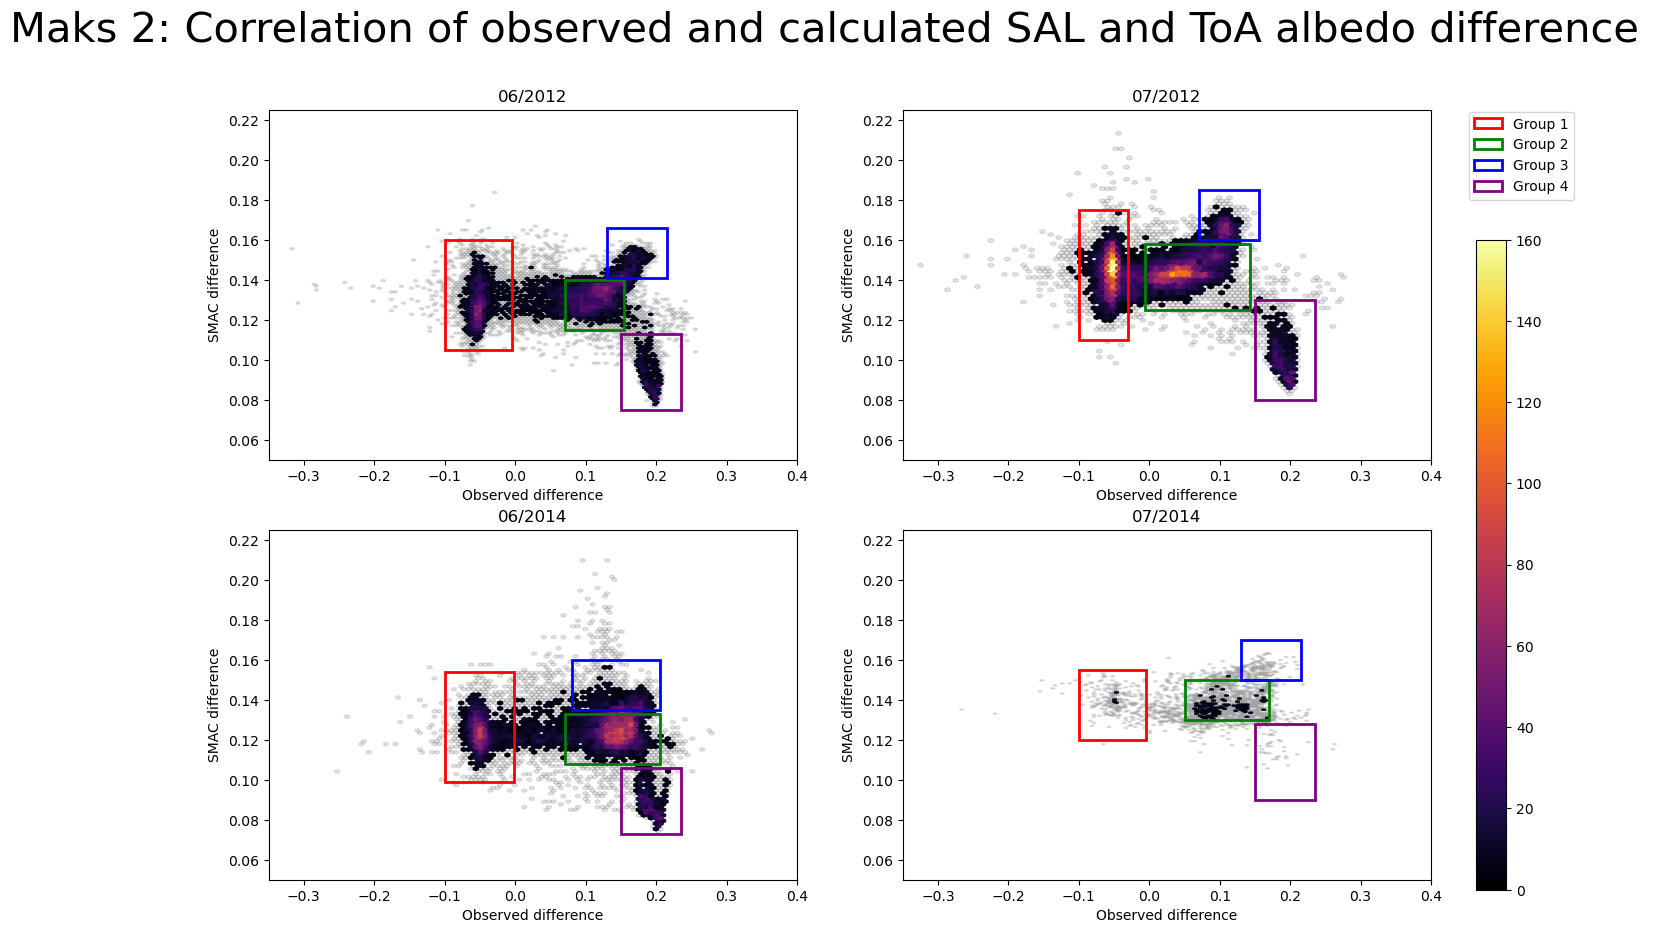

In [56]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.05
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax0)
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.105),0.095,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

ax0.add_patch(Rectangle((0.07,0.115),0.085,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2))

ax0.add_patch(Rectangle((0.13,0.141),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2))

ax0.add_patch(Rectangle((0.15,0.075),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2))

c = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax1)
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.11),0.07,0.065,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

ax1.add_patch(Rectangle((-0.0065,0.125),0.15,0.033,
                    edgecolor='green',
                    facecolor='none',
                    lw=2))

ax1.add_patch(Rectangle((0.07,0.16),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2))

ax1.add_patch(Rectangle((0.15,0.08),0.085,0.05,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2))

c = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')


ax2.add_patch(Rectangle((-0.1,0.099),0.098,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

ax2.add_patch(Rectangle((0.07,0.108),0.135,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2))

ax2.add_patch(Rectangle((0.08,0.135),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2))

ax2.add_patch(Rectangle((0.15,0.073),0.085,0.033,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2))



c = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax3)
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')


ax3.add_patch(Rectangle((-0.1,0.12),0.095,0.035,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    label="Group 1"))

ax3.add_patch(Rectangle((0.05,0.13),0.12,0.02,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label="Group 2"))

ax3.add_patch(Rectangle((0.13,0.15),0.085,0.02,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2, 
                    label="Group 3"))

ax3.add_patch(Rectangle((0.15,0.09),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2, 
                    label="Group 4"))


#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Maks 2: Correlation of observed and calculated SAL and ToA albedo difference ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_ToA_difference_correlation_mask2_Group1_4.png')
plt.show()

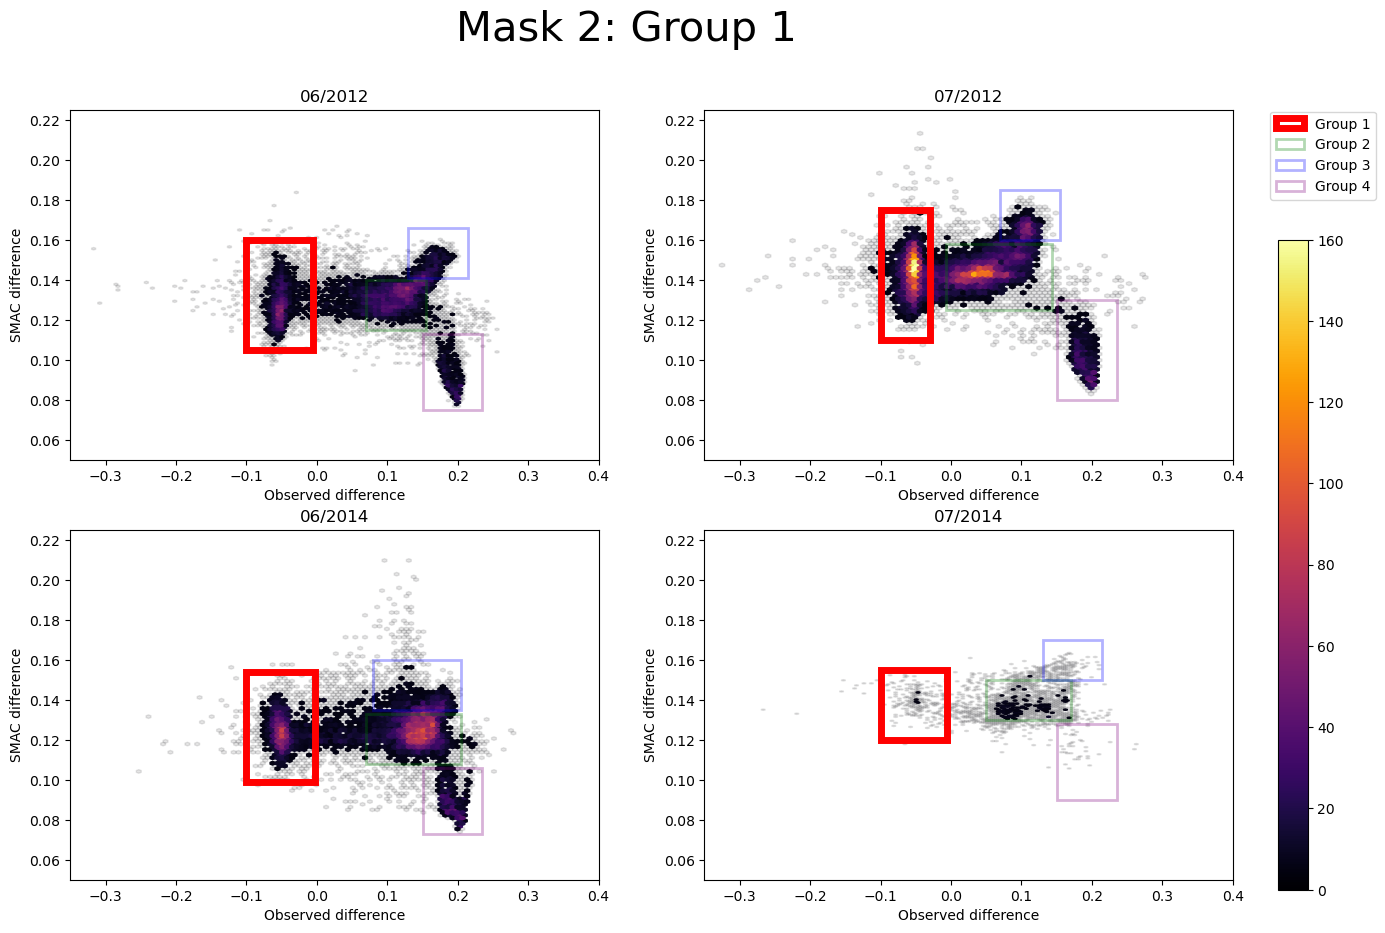

In [57]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.05
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax0)
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.105),0.095,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=5))

ax0.add_patch(Rectangle((0.07,0.115),0.085,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.13,0.141),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.15,0.075),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

c = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax1)
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.11),0.07,0.065,
                    edgecolor='red',
                    facecolor='none',
                    lw=5))

ax1.add_patch(Rectangle((-0.0065,0.125),0.15,0.033,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.07,0.16),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.15,0.08),0.085,0.05,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

c = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax2)
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')


ax2.add_patch(Rectangle((-0.1,0.099),0.098,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=5))

ax2.add_patch(Rectangle((0.07,0.108),0.135,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.08,0.135),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.15,0.073),0.085,0.033,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))



c = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax3)
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')


ax3.add_patch(Rectangle((-0.1,0.12),0.095,0.035,
                    edgecolor='red',
                    facecolor='none',
                    lw=5,
                    label="Group 1"))

ax3.add_patch(Rectangle((0.05,0.13),0.12,0.02,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label="Group 2",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.13,0.15),0.085,0.02,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2, 
                    label="Group 3",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.15,0.09),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2, 
                    label="Group 4",
                    alpha=0.3))


#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 2: Group 1 ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_TOA_difference_mask2_Group1_highlighted.png')
plt.show()

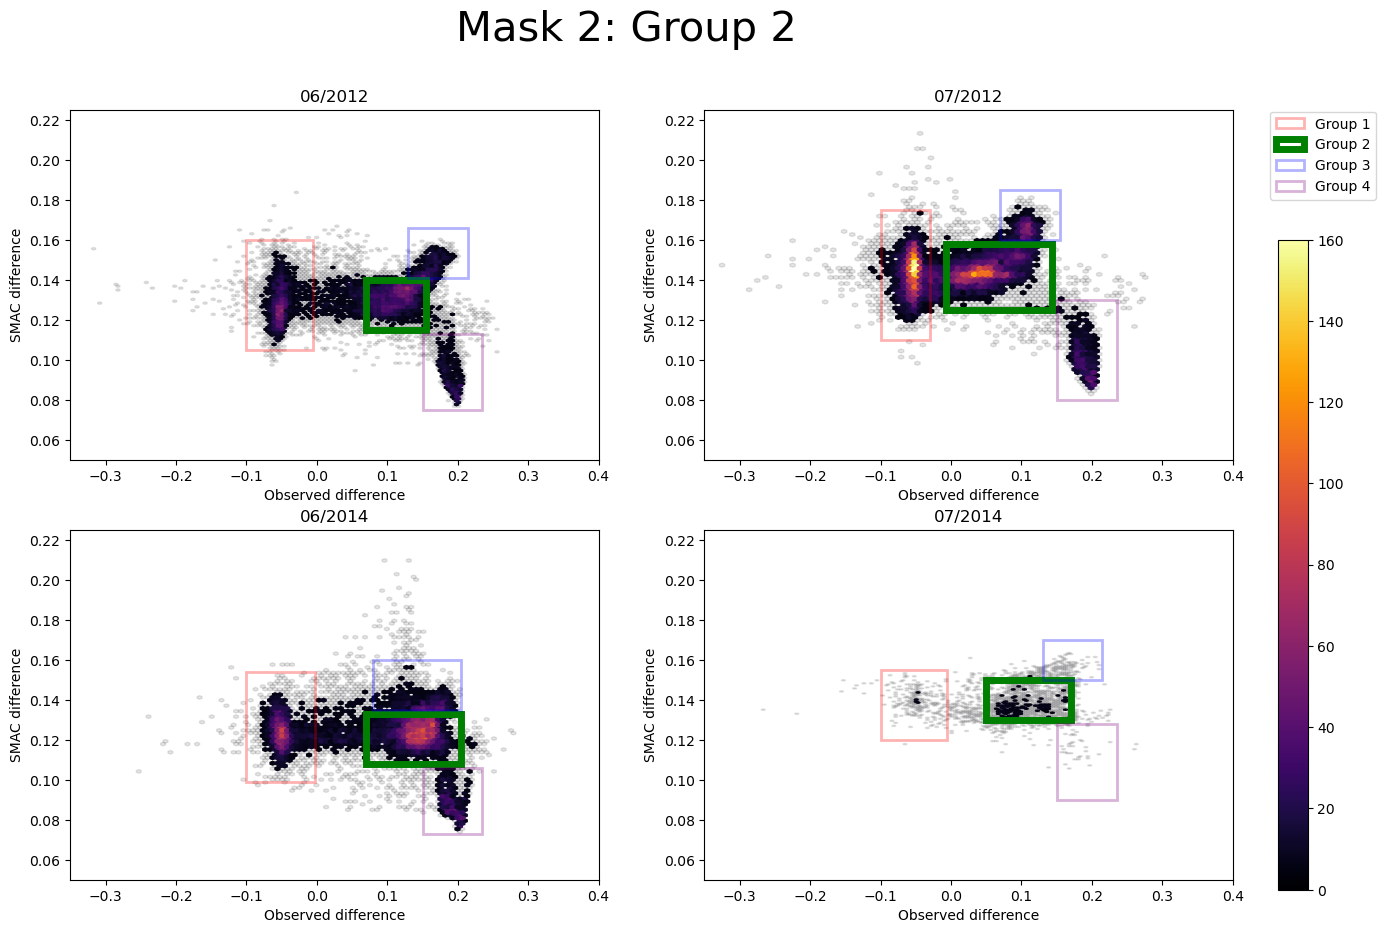

In [58]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.05
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax0)
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.105),0.095,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.07,0.115),0.085,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=5))

ax0.add_patch(Rectangle((0.13,0.141),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.15,0.075),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

c = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax1)
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.11),0.07,0.065,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((-0.0065,0.125),0.15,0.033,
                    edgecolor='green',
                    facecolor='none',
                    lw=5))

ax1.add_patch(Rectangle((0.07,0.16),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.15,0.08),0.085,0.05,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

c = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax2)
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')


ax2.add_patch(Rectangle((-0.1,0.099),0.098,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.07,0.108),0.135,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=5))

ax2.add_patch(Rectangle((0.08,0.135),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.15,0.073),0.085,0.033,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))



c = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')


ax3.add_patch(Rectangle((-0.1,0.12),0.095,0.035,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    label="Group 1",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.05,0.13),0.12,0.02,
                    edgecolor='green',
                    facecolor='none',
                    lw=5,
                    label="Group 2"))

ax3.add_patch(Rectangle((0.13,0.15),0.085,0.02,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2, 
                    label="Group 3",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.15,0.09),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2, 
                    label="Group 4",
                    alpha=0.3))

#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 2: Group 2 ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group2_highlighted.png')
plt.show()

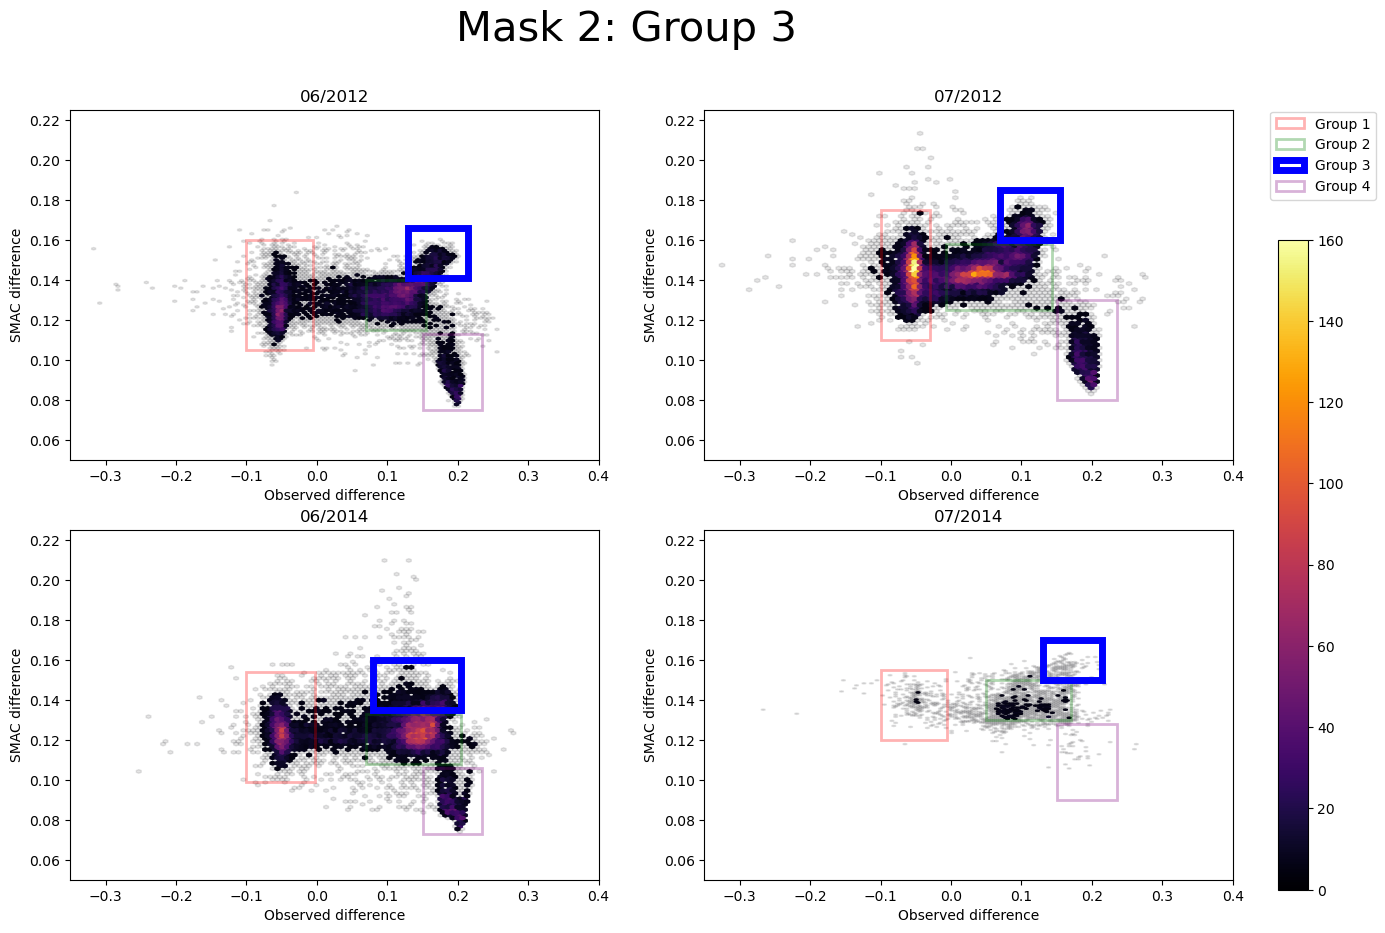

In [59]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.05
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax0)
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.105),0.095,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.07,0.115),0.085,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.13,0.141),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5))

ax0.add_patch(Rectangle((0.15,0.075),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

c = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax1)
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.11),0.07,0.065,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((-0.0065,0.125),0.15,0.033,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.07,0.16),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5))

ax1.add_patch(Rectangle((0.15,0.08),0.085,0.05,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

c = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax2)
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')


ax2.add_patch(Rectangle((-0.1,0.099),0.098,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.07,0.108),0.135,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.08,0.135),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5))

ax2.add_patch(Rectangle((0.15,0.073),0.085,0.033,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))



c = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
#cb = fig.colorbar(c_large, ax=ax3)
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')


ax3.add_patch(Rectangle((-0.1,0.12),0.095,0.035,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    label="Group 1",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.05,0.13),0.12,0.02,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label="Group 2",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.13,0.15),0.085,0.02,
                    edgecolor='blue',
                    facecolor='none',
                    lw=5, 
                    label="Group 3"))

ax3.add_patch(Rectangle((0.15,0.09),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=2, 
                    label="Group 4",
                    alpha=0.3))


#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 2: Group 3 ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group3_highlighted.png')
plt.show()

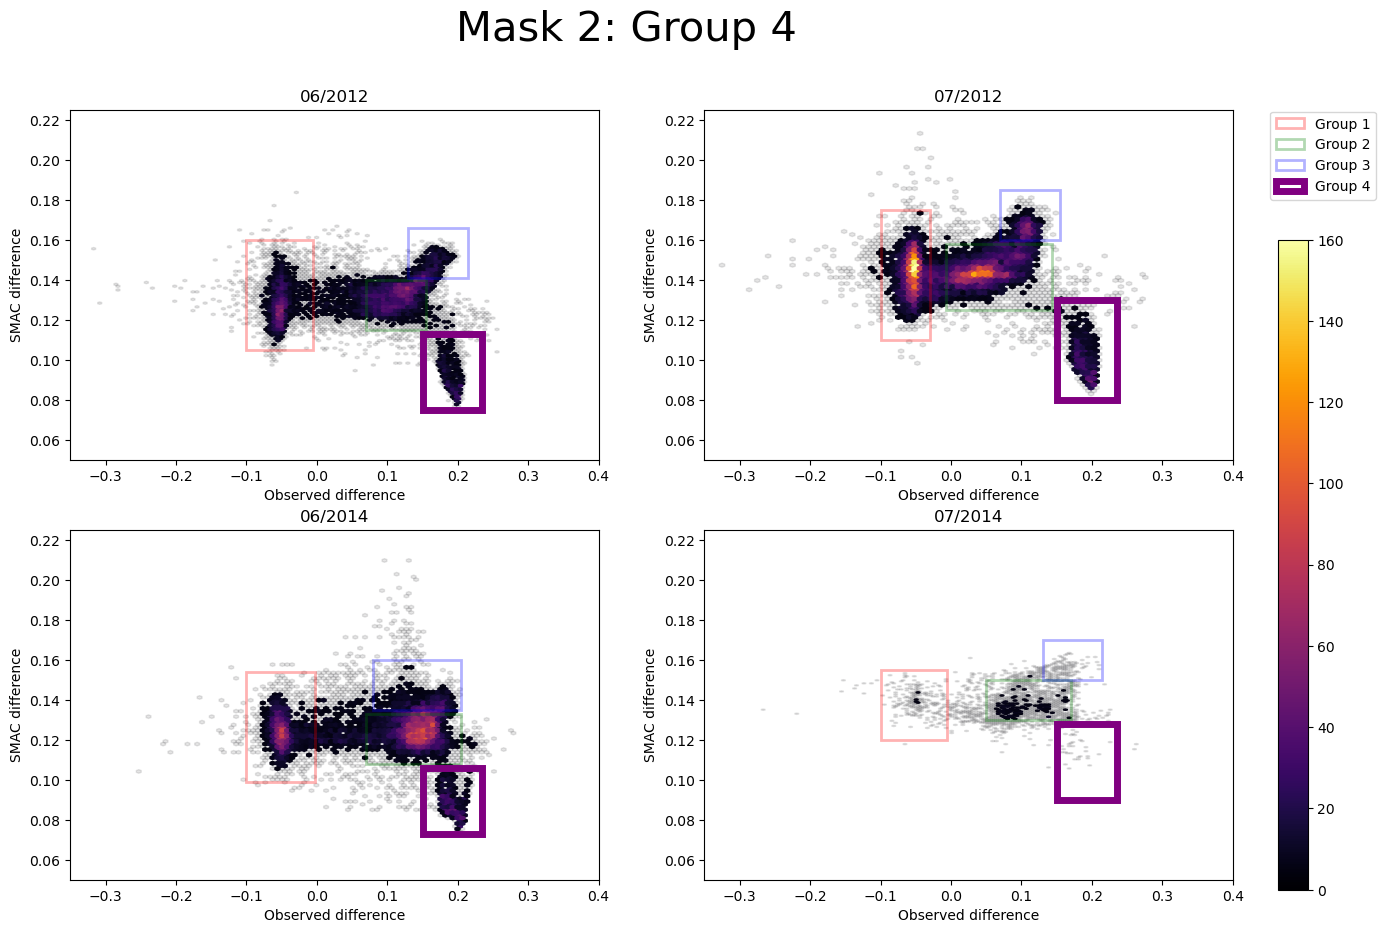

In [60]:
#Plot results in subplots
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(15, 10))

xmin = -0.35
xmax = 0.4
ymin = 0.05
ymax = 0.225

c = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax0.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201206, DIFF_SMAC_list_201206_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax0.axis([xmin, xmax, ymin, ymax])
ax0.set_title('06/2012')
ax0.set_xlabel('Observed difference')
ax0.set_ylabel('SMAC difference')

ax0.add_patch(Rectangle((-0.1,0.105),0.095,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.07,0.115),0.085,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.13,0.141),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax0.add_patch(Rectangle((0.15,0.075),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=5))

c = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax1.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201207, DIFF_SMAC_list_201207_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax1.axis([xmin, xmax, ymin, ymax])
ax1.set_title('07/2012')
ax1.set_xlabel('Observed difference')
ax1.set_ylabel('SMAC difference')

ax1.add_patch(Rectangle((-0.1,0.11),0.07,0.065,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((-0.0065,0.125),0.15,0.033,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.07,0.16),0.085,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax1.add_patch(Rectangle((0.15,0.08),0.085,0.05,
                    edgecolor='purple',
                    facecolor='none',
                    lw=5))

c = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax2.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201406, DIFF_SMAC_list_201406_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax2.axis([xmin, xmax, ymin, ymax])
ax2.set_title('06/2014')
ax2.set_xlabel('Observed difference')
ax2.set_ylabel('SMAC difference')


ax2.add_patch(Rectangle((-0.1,0.099),0.098,0.055,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.07,0.108),0.135,0.025,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.08,0.135),0.125,0.025,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2,
                    alpha=0.3))

ax2.add_patch(Rectangle((0.15,0.073),0.085,0.033,
                    edgecolor='purple',
                    facecolor='none',
                    lw=5))



c = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=1, alpha=.1)
c_large = ax3.hexbin(stacked_diffs_mask2_SAL_TOA_mean_list_201407, DIFF_SMAC_list_201407_Mask2, cmap='inferno', vmin= 0, vmax=160, mincnt=5)

ax3.axis([xmin, xmax, ymin, ymax])
ax3.set_title('07/2014')
ax3.set_xlabel('Observed difference')
ax3.set_ylabel('SMAC difference')


ax3.add_patch(Rectangle((-0.1,0.12),0.095,0.035,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    label="Group 1",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.05,0.13),0.12,0.02,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label="Group 2",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.13,0.15),0.085,0.02,
                    edgecolor='blue',
                    facecolor='none',
                    lw=2, 
                    label="Group 3",
                    alpha=0.3))

ax3.add_patch(Rectangle((0.15,0.09),0.085,0.038,
                    edgecolor='purple',
                    facecolor='none',
                    lw=5, 
                    label="Group 4"))

#Add legend
f.legend(loc='upper right', bbox_to_anchor=(1, 0.885))


#Add subtitle
f.suptitle('Mask 2: Group 4 ', fontsize=30)


#Add colorbar
cb_ax = f.add_axes([0.93, 0.1, 0.02, 0.65])
cbar = f.colorbar(c_large, cax=cb_ax)


#Save results
plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group4_highlighted.png')
plt.show()

Make masks 1-4 based on limits of observed and modelled data defined in previous graphs. 

In [61]:
DIFF_SMAC_list_201206_array = np.asarray(DIFF_SMAC_list_201206_Mask2)

In [62]:
DIFF_SMAC_list_201207_array = np.asarray(DIFF_SMAC_list_201207_Mask2)

In [63]:
DIFF_SMAC_list_201406_array = np.asarray(DIFF_SMAC_list_201206_Mask2)

In [64]:
DIFF_SMAC_list_201407_array = np.asarray(DIFF_SMAC_list_201407_Mask2)

In [65]:
DIFF_SMAC_list_201206_array_2d = np.reshape(DIFF_SMAC_list_201206_array, (359,359)).T

In [66]:
DIFF_SMAC_list_201207_array_2d = np.reshape(DIFF_SMAC_list_201207_array, (359,359)).T

In [67]:
DIFF_SMAC_list_201406_array_2d = np.reshape(DIFF_SMAC_list_201406_array, (359,359)).T

In [68]:
DIFF_SMAC_list_201407_array_2d = np.reshape(DIFF_SMAC_list_201407_array, (359,359)).T

Define limits for each group

Group 1 (red)

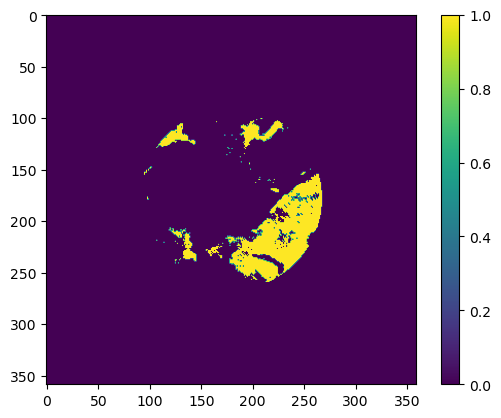

In [69]:
condition_lower_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062012_1 = condition_lower_062012>-0.1

condition_upper_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062012_1 = condition_upper_062012<-0.005

condition_secondary_lower_062012_1 = DIFF_SMAC_list_201206_array_2d.T>0.105

condition_secondary_upper_062012_1 = DIFF_SMAC_list_201206_array_2d.T<0.16


combined_condition_062012_1 = (condition_lower_062012_1) & (condition_upper_062012_1) & (condition_secondary_lower_062012_1) & (condition_secondary_upper_062012_1)

plt.imshow(combined_condition_062012_1)
plt.colorbar()

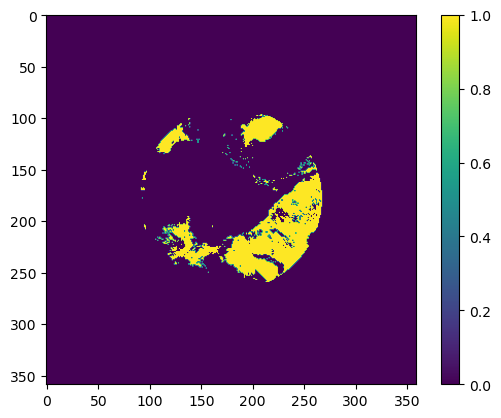

In [70]:
condition_lower_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072012_1 = condition_lower_072012>-0.1

condition_upper_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072012_1 = condition_upper_072012<-0.03

condition_secondary_lower_072012_1 = DIFF_SMAC_list_201207_array_2d.T>0.11

condition_secondary_upper_072012_1 = DIFF_SMAC_list_201207_array_2d.T<0.175


combined_condition_072012_1 = (condition_lower_072012_1) & (condition_upper_072012_1) & (condition_secondary_lower_072012_1) & (condition_secondary_upper_072012_1)

plt.imshow(combined_condition_072012_1)
plt.colorbar()

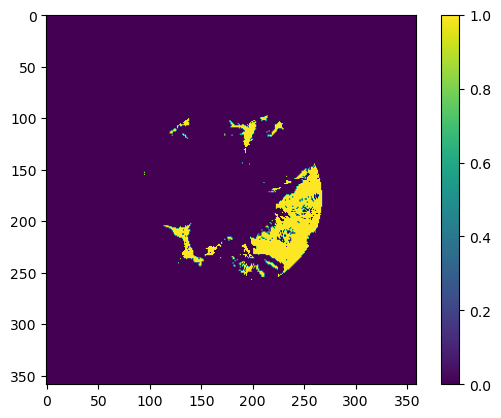

In [71]:
condition_lower_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062014_1 = condition_lower_062014>-0.1

condition_upper_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062014_1 = condition_upper_062014<-0.002

condition_secondary_lower_062014_1 = DIFF_SMAC_list_201406_array_2d.T>0.099

condition_secondary_upper_062014_1 = DIFF_SMAC_list_201406_array_2d.T<0.154


combined_condition_062014_1 = (condition_lower_062014_1) & (condition_upper_062014_1) & (condition_secondary_lower_062014_1) & (condition_secondary_upper_062014_1)

plt.imshow(combined_condition_062014_1)
plt.colorbar()

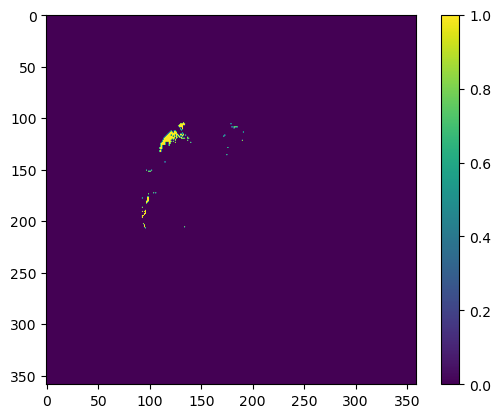

In [72]:
condition_lower_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072014_1 = condition_lower_072014>-0.1

condition_upper_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072014_1 = condition_upper_072014<-0.005

condition_secondary_lower_072014_1 = DIFF_SMAC_list_201407_array_2d.T>0.12

condition_secondary_upper_072014_1 = DIFF_SMAC_list_201407_array_2d.T<0.155


combined_condition_072014_1 = (condition_lower_072014_1) & (condition_upper_072014_1) & (condition_secondary_lower_072014_1) & (condition_secondary_upper_072014_1)

plt.imshow(combined_condition_072014_1)
plt.colorbar()

Group 2 (green)

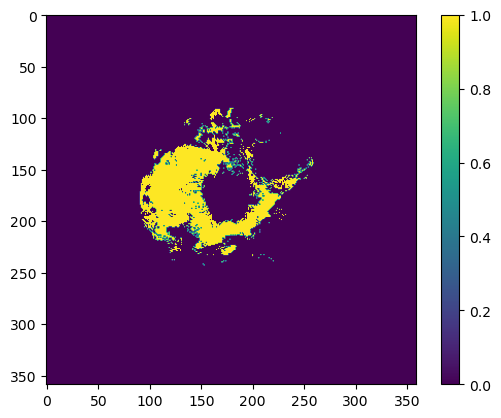

In [73]:
condition_lower_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062012_2 = condition_lower_062012>0.07

condition_upper_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062012_2 = condition_upper_062012<0.155

condition_secondary_lower_062012_2 = DIFF_SMAC_list_201206_array_2d.T>0.115

condition_secondary_upper_062012_2 = DIFF_SMAC_list_201206_array_2d.T<0.14


combined_condition_062012_2 = (condition_lower_062012_2) & (condition_upper_062012_2) & (condition_secondary_lower_062012_2) & (condition_secondary_upper_062012_2)

plt.imshow(combined_condition_062012_2)
plt.colorbar()

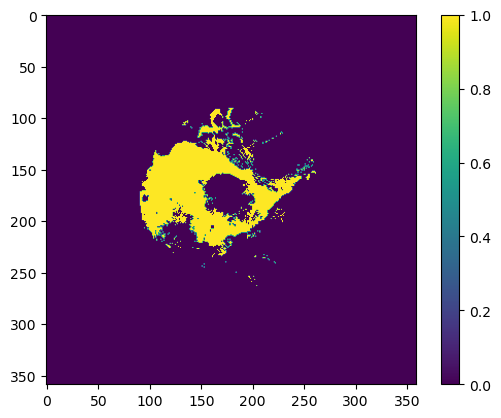

In [74]:
condition_lower_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072012_2 = condition_lower_072012>-0.0065

condition_upper_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072012_2 = condition_upper_072012<0.1435

condition_secondary_lower_072012_2 = DIFF_SMAC_list_201207_array_2d.T>0.125

condition_secondary_upper_072012_2 = DIFF_SMAC_list_201207_array_2d.T<0.158


combined_condition_072012_2 = (condition_lower_072012_2) & (condition_upper_072012_2) & (condition_secondary_lower_072012_2) & (condition_secondary_upper_072012_2)

plt.imshow(combined_condition_072012_2)
plt.colorbar()

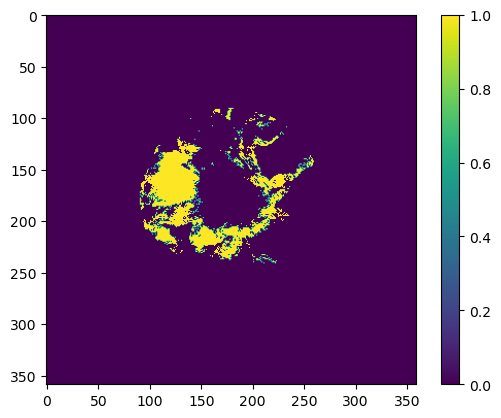

In [75]:
condition_lower_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062014_2 = condition_lower_062014>0.07

condition_upper_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062014_2 = condition_upper_062014<0.205

condition_secondary_lower_062014_2 = DIFF_SMAC_list_201406_array_2d.T>0.108

condition_secondary_upper_062014_2 = DIFF_SMAC_list_201406_array_2d.T<0.133


combined_condition_062014_2 = (condition_lower_062014_2) & (condition_upper_062014_2) & (condition_secondary_lower_062014_2) & (condition_secondary_upper_062014_2)

plt.imshow(combined_condition_062014_2)
plt.colorbar()

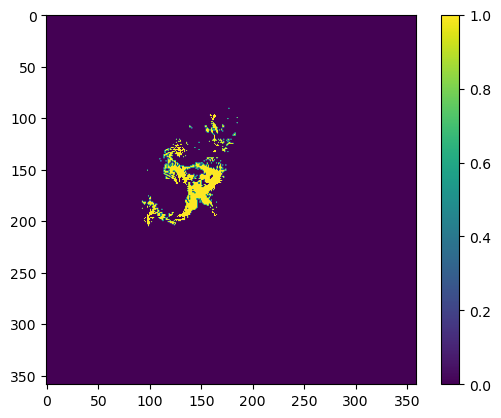

In [76]:
condition_lower_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072014_2 = condition_lower_072014>0.05

condition_upper_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072014_2 = condition_upper_072014<0.17

condition_secondary_lower_072014_2 = DIFF_SMAC_list_201407_array_2d.T>0.13

condition_secondary_upper_072014_2 = DIFF_SMAC_list_201407_array_2d.T<0.15


combined_condition_072014_2 = (condition_lower_072014_2) & (condition_upper_072014_2) & (condition_secondary_lower_072014_2) & (condition_secondary_upper_072014_2)

plt.imshow(combined_condition_072014_2)
plt.colorbar()

Group 3 (blue)

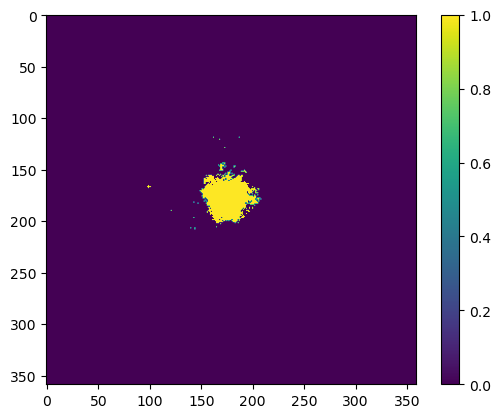

In [77]:
condition_lower_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062012_3 = condition_lower_062012>0.13

condition_upper_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062012_3 = condition_upper_062012<0.215

condition_secondary_lower_062012_3 = DIFF_SMAC_list_201206_array_2d.T>0.141

condition_secondary_upper_062012_3 = DIFF_SMAC_list_201206_array_2d.T<0.166


combined_condition_062012_3 = (condition_lower_062012_3) & (condition_upper_062012_3) & (condition_secondary_lower_062012_3) & (condition_secondary_upper_062012_3)

plt.imshow(combined_condition_062012_3)
plt.colorbar()

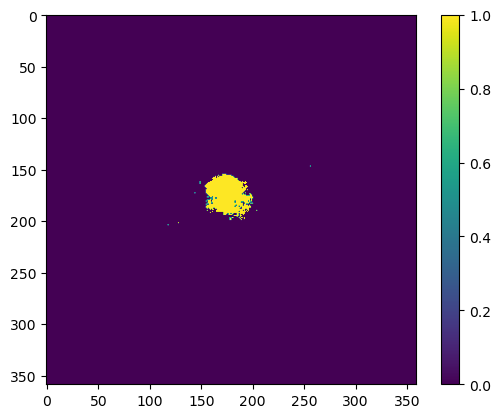

In [78]:
condition_lower_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072012_3 = condition_lower_072012>0.07

condition_upper_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072012_3 = condition_upper_072012<0.155

condition_secondary_lower_072012_3 = DIFF_SMAC_list_201207_array_2d.T>0.16

condition_secondary_upper_072012_3 = DIFF_SMAC_list_201207_array_2d.T<0.185


combined_condition_072012_3 = (condition_lower_072012_3) & (condition_upper_072012_3) & (condition_secondary_lower_072012_3) & (condition_secondary_upper_072012_3)

plt.imshow(combined_condition_072012_3)
plt.colorbar()

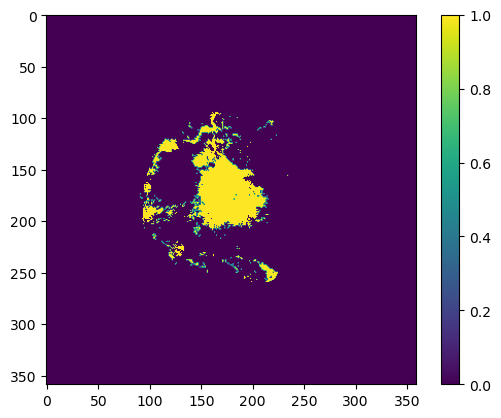

In [79]:
condition_lower_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062014_3 = condition_lower_062014>0.08

condition_upper_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062014_3 = condition_upper_062014<0.205

condition_secondary_lower_062014_3 = DIFF_SMAC_list_201406_array_2d.T>0.135

condition_secondary_upper_062014_3 = DIFF_SMAC_list_201406_array_2d.T<0.16


combined_condition_062014_3 = (condition_lower_062014_3) & (condition_upper_062014_3) & (condition_secondary_lower_062014_3) & (condition_secondary_upper_062014_3)

plt.imshow(combined_condition_062014_3)
plt.colorbar()

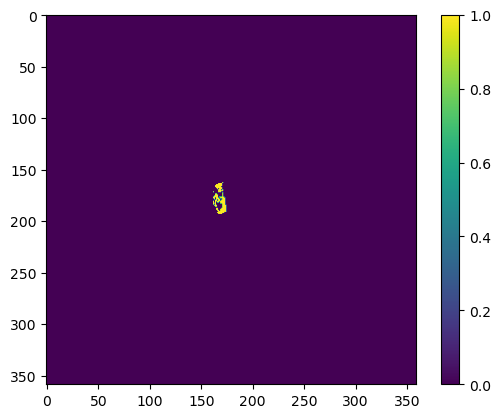

In [80]:
condition_lower_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072014_3 = condition_lower_072014>0.13

condition_upper_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072014_3 = condition_upper_072014<0.215

condition_secondary_lower_072014_3 = DIFF_SMAC_list_201407_array_2d.T>0.15

condition_secondary_upper_072014_3 = DIFF_SMAC_list_201407_array_2d.T<0.17


combined_condition_072014_3 = (condition_lower_072014_3) & (condition_upper_072014_3) & (condition_secondary_lower_072014_3) & (condition_secondary_upper_072014_3)

plt.imshow(combined_condition_072014_3)
plt.colorbar()

Group 4 (purple)

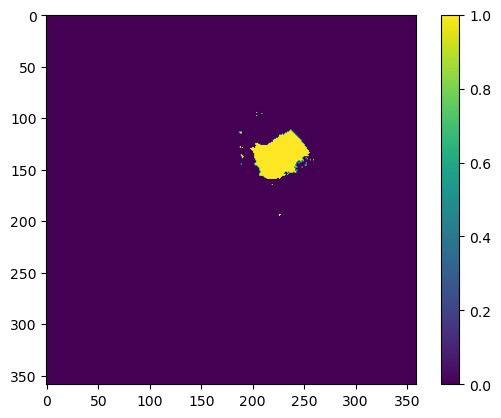

In [81]:
condition_lower_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062012_4 = condition_lower_062012>0.15

condition_upper_062012 = stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062012_4 = condition_upper_062012<0.235

condition_secondary_lower_062012_4 = DIFF_SMAC_list_201206_array_2d.T>0.075

condition_secondary_upper_062012_4 = DIFF_SMAC_list_201206_array_2d.T<0.113


combined_condition_062012_4 = (condition_lower_062012_4) & (condition_upper_062012_4) & (condition_secondary_lower_062012_4) & (condition_secondary_upper_062012_4)

plt.imshow(combined_condition_062012_4)
plt.colorbar()

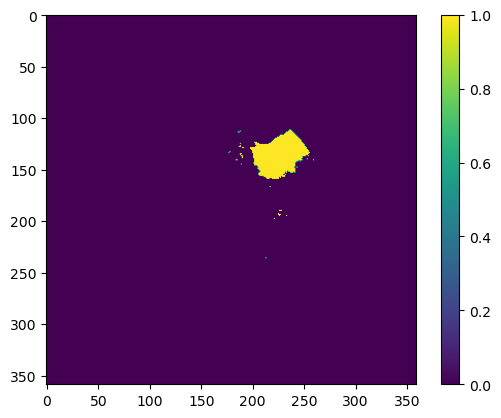

In [82]:
condition_lower_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072012_4 = condition_lower_072012>0.15

condition_upper_072012 = stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072012_4 = condition_upper_072012<0.235

condition_secondary_lower_072012_4 = DIFF_SMAC_list_201207_array_2d.T>0.08

condition_secondary_upper_072012_4 = DIFF_SMAC_list_201207_array_2d.T<0.13


combined_condition_072012_4 = (condition_lower_072012_4) & (condition_upper_072012_4) & (condition_secondary_lower_072012_4) & (condition_secondary_upper_072012_4)

plt.imshow(combined_condition_072012_4)
plt.colorbar()

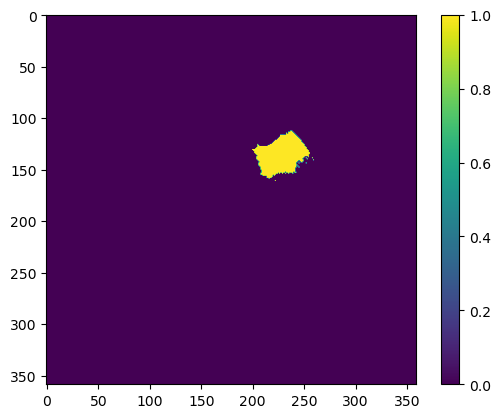

In [83]:
condition_lower_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_062014_4 = condition_lower_062014>0.15

condition_upper_062014 = stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_062014_4 = condition_upper_062014<0.235

condition_secondary_lower_062014_4 = DIFF_SMAC_list_201406_array_2d.T>0.073

condition_secondary_upper_062014_4 = DIFF_SMAC_list_201406_array_2d.T<0.106


combined_condition_062014_4 = (condition_lower_062014_4) & (condition_upper_062014_4) & (condition_secondary_lower_062014_4) & (condition_secondary_upper_062014_4)

plt.imshow(combined_condition_062014_4)
plt.colorbar()

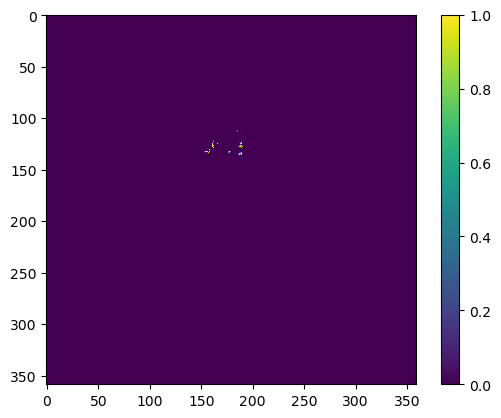

In [84]:
condition_lower_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_lower_072014_4 = condition_lower_072014>0.15

condition_upper_072014 = stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T
condition_upper_072014_4 = condition_upper_072014<0.235

condition_secondary_lower_072014_4 = DIFF_SMAC_list_201407_array_2d.T>0.09

condition_secondary_upper_072014_4 = DIFF_SMAC_list_201407_array_2d.T<0.128


combined_condition_072014_4 = (condition_lower_072014_4) & (condition_upper_072014_4) & (condition_secondary_lower_072014_4) & (condition_secondary_upper_072014_4)

plt.imshow(combined_condition_072014_4)
plt.colorbar()

Use the masks created in previous step to select the correct data

Group 1

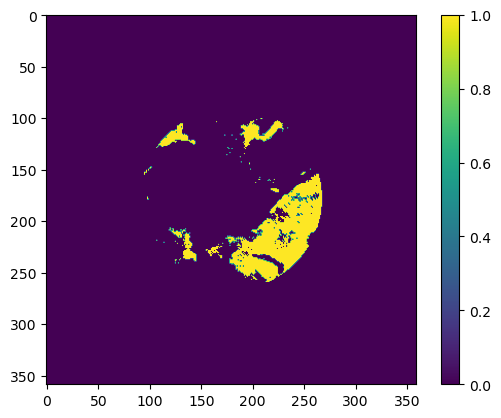

In [85]:
combined_condition_062012_1_nan = np.array(combined_condition_062012_1)

plt.imshow(combined_condition_062012_1_nan)
plt.colorbar()
plt.show()

combined_condition_062012_1_nan = np.where((combined_condition_062012_1_nan==0.0) & (stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062012_1_nan)



data_062012_1 = combined_condition_062012_1_nan*stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

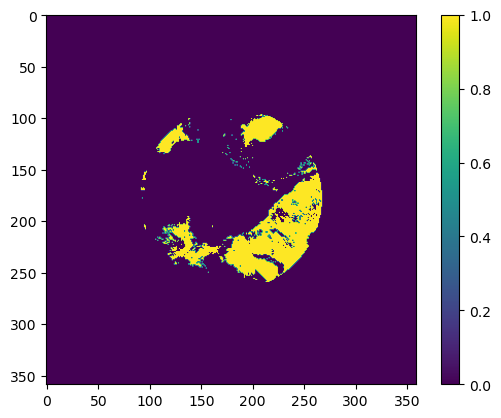

In [86]:
combined_condition_072012_1_nan = np.array(combined_condition_072012_1)

plt.imshow(combined_condition_072012_1_nan)
plt.colorbar()
plt.show()

combined_condition_072012_1_nan = np.where((combined_condition_072012_1_nan==0.0) & (stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072012_1_nan)



data_072012_1 = combined_condition_072012_1_nan*stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

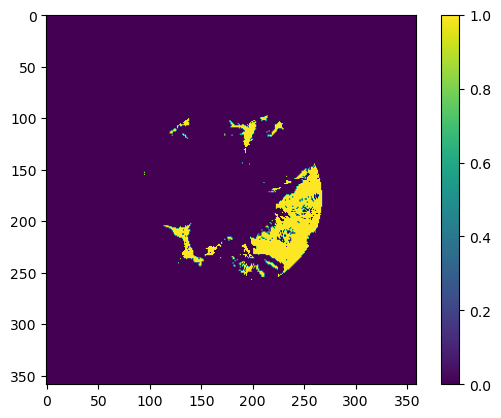

In [87]:
combined_condition_062014_1_nan = np.array(combined_condition_062014_1)

plt.imshow(combined_condition_062014_1_nan)
plt.colorbar()
plt.show()

combined_condition_062014_1_nan = np.where((combined_condition_062014_1_nan==0.0) & (stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062014_1_nan)



data_062014_1 = combined_condition_062014_1_nan*stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

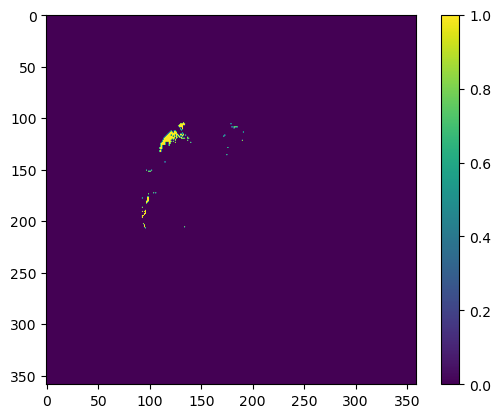

In [88]:
combined_condition_072014_1_nan = np.array(combined_condition_072014_1)

plt.imshow(combined_condition_072014_1_nan)
plt.colorbar()
plt.show()

combined_condition_072014_1_nan = np.where((combined_condition_072014_1_nan==0.0) & (stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072014_1_nan)



data_072014_1 = combined_condition_072014_1_nan*stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

Group 2

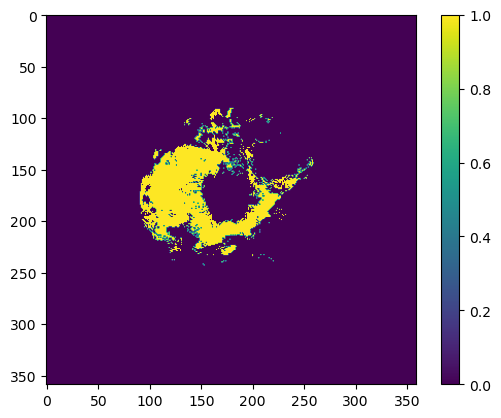

In [89]:
combined_condition_062012_2_nan = np.array(combined_condition_062012_2)

plt.imshow(combined_condition_062012_2_nan)
plt.colorbar()
plt.show()

combined_condition_062012_2_nan = np.where((combined_condition_062012_2_nan==0.0) & (stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062012_2_nan)



data_062012_2 = combined_condition_062012_2_nan*stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

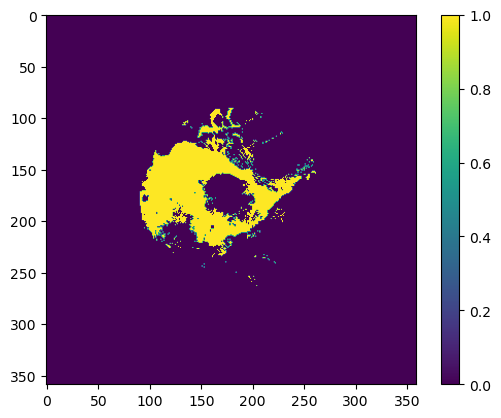

In [90]:
combined_condition_072012_2_nan = np.array(combined_condition_072012_2)

plt.imshow(combined_condition_072012_2_nan)
plt.colorbar()
plt.show()

combined_condition_072012_2_nan = np.where((combined_condition_072012_2_nan==0.0) & (stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072012_2_nan)



data_072012_2 = combined_condition_072012_2_nan*stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

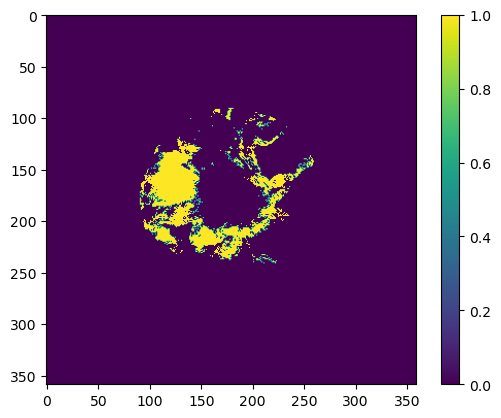

In [91]:
combined_condition_062014_2_nan = np.array(combined_condition_062014_2)

plt.imshow(combined_condition_062014_2_nan)
plt.colorbar()
plt.show()

combined_condition_062014_2_nan = np.where((combined_condition_062014_2_nan==0.0) & (stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062014_2_nan)



data_062014_2 = combined_condition_062014_2_nan*stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

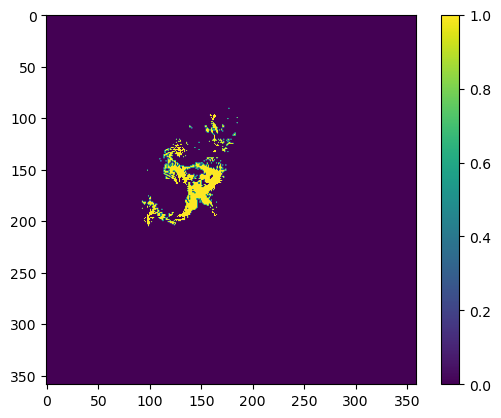

In [92]:
combined_condition_072014_2_nan = np.array(combined_condition_072014_2)

plt.imshow(combined_condition_072014_2_nan)
plt.colorbar()
plt.show()

combined_condition_072014_2_nan = np.where((combined_condition_072014_2_nan==0.0) & (stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072014_2_nan)



data_072014_2 = combined_condition_072014_2_nan*stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

Group 3

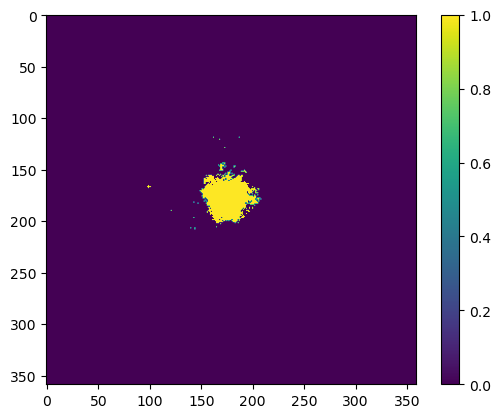

In [93]:
combined_condition_062012_3_nan = np.array(combined_condition_062012_3)

plt.imshow(combined_condition_062012_3_nan)
plt.colorbar()
plt.show()

combined_condition_062012_3_nan = np.where((combined_condition_062012_3_nan==0.0) & (stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062012_3_nan)



data_062012_3 = combined_condition_062012_3_nan*stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

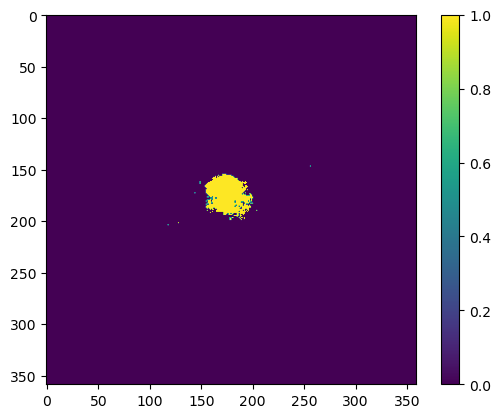

In [94]:
combined_condition_072012_3_nan = np.array(combined_condition_072012_3)

plt.imshow(combined_condition_072012_3_nan)
plt.colorbar()
plt.show()

combined_condition_072012_3_nan = np.where((combined_condition_072012_3_nan==0.0) & (stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072012_3_nan)



data_072012_3 = combined_condition_072012_3_nan*stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

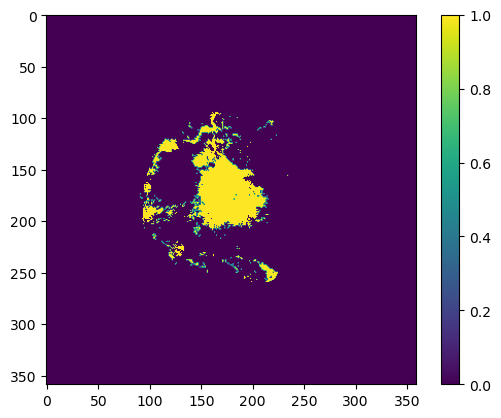

In [95]:
combined_condition_062014_3_nan = np.array(combined_condition_062014_3)

plt.imshow(combined_condition_062014_3_nan)
plt.colorbar()
plt.show()

combined_condition_062014_3_nan = np.where((combined_condition_062014_3_nan==0.0) & (stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062014_3_nan)



data_062014_3 = combined_condition_062014_3_nan*stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

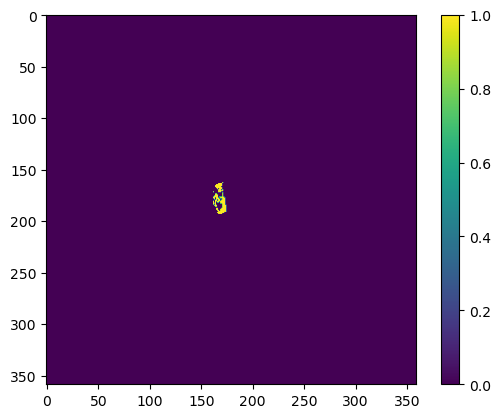

In [96]:
combined_condition_072014_3_nan = np.array(combined_condition_072014_3)

plt.imshow(combined_condition_072014_3_nan)
plt.colorbar()
plt.show()

combined_condition_072014_3_nan = np.where((combined_condition_072014_3_nan==0.0) & (stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072014_3_nan)



data_072014_3 = combined_condition_072014_3_nan*stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

Group 4

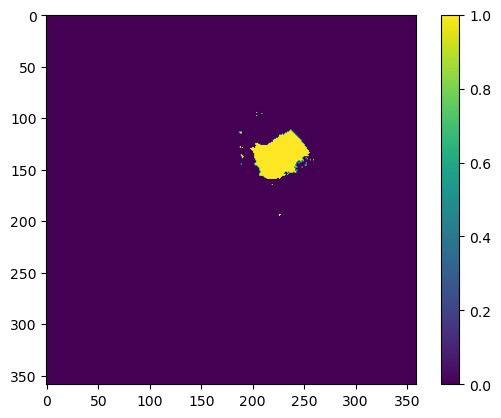

In [97]:
combined_condition_062012_4_nan = np.array(combined_condition_062012_4)

plt.imshow(combined_condition_062012_4_nan)
plt.colorbar()
plt.show()

combined_condition_062012_4_nan = np.where((combined_condition_062012_4_nan==0.0) & (stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062012_4_nan)



data_062012_4 = combined_condition_062012_4_nan*stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

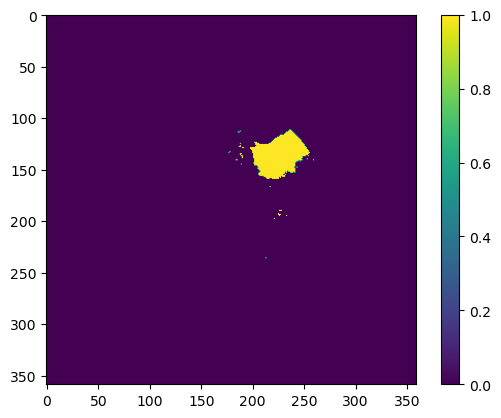

In [98]:
combined_condition_072012_4_nan = np.array(combined_condition_072012_4)

plt.imshow(combined_condition_072012_4_nan)
plt.colorbar()
plt.show()

combined_condition_072012_4_nan = np.where((combined_condition_072012_4_nan==0.0) & (stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072012_4_nan)



data_072012_4 = combined_condition_072012_4_nan*stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

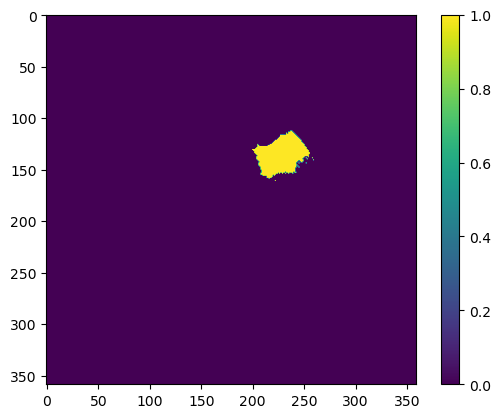

In [99]:
combined_condition_062014_4_nan = np.array(combined_condition_062014_4)

plt.imshow(combined_condition_062014_4_nan)
plt.colorbar()
plt.show()

combined_condition_062014_4_nan = np.where((combined_condition_062014_4_nan==0.0) & (stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_062014_4_nan)



data_062014_4 = combined_condition_062014_4_nan*stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

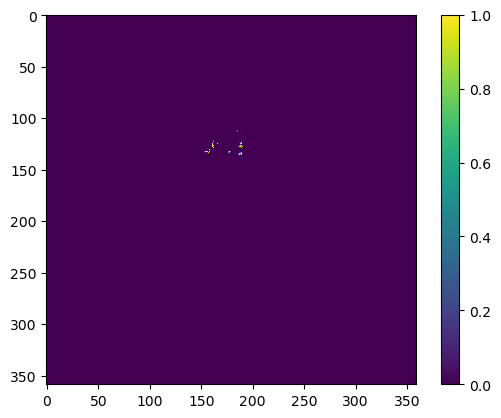

In [100]:
combined_condition_072014_4_nan = np.array(combined_condition_072014_4)

plt.imshow(combined_condition_072014_4_nan)
plt.colorbar()
plt.show()

combined_condition_072014_4_nan = np.where((combined_condition_072014_4_nan==0.0) & (stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T!=0.0) , np.nan,combined_condition_072014_4_nan)



data_072014_4 = combined_condition_072014_4_nan*stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'].mean('time')[1:, 1:].T

Remove Nan values

Group 1

In [ ]:
masked_data_062012_1 = ma.masked_where(np.isnan(data_062012_1),data_062012_1)

masked_data_072012_1 = ma.masked_where(np.isnan(data_072012_1),data_072012_1)

masked_data_062014_1 = ma.masked_where(np.isnan(data_062014_1),data_062014_1)

masked_data_072014_1 = ma.masked_where(np.isnan(data_072014_1),data_072014_1)

Group 2

In [ ]:
masked_data_062012_2 = ma.masked_where(np.isnan(data_062012_2),data_062012_2)

masked_data_072012_2 = ma.masked_where(np.isnan(data_072012_2),data_072012_2)

masked_data_062014_2 = ma.masked_where(np.isnan(data_062014_2),data_062014_2)

masked_data_072014_2 = ma.masked_where(np.isnan(data_072014_2),data_072014_2)

Group 3

In [ ]:
masked_data_062012_3 = ma.masked_where(np.isnan(data_062012_3),data_062012_3)

masked_data_072012_3 = ma.masked_where(np.isnan(data_072012_3),data_072012_3)

masked_data_062014_3 = ma.masked_where(np.isnan(data_062014_3),data_062014_3)

masked_data_072014_3 = ma.masked_where(np.isnan(data_072014_3),data_072014_3)

Group 4

In [ ]:
masked_data_062012_4 = ma.masked_where(np.isnan(data_062012_4),data_062012_4)

masked_data_072012_4 = ma.masked_where(np.isnan(data_072012_4),data_072012_4)

masked_data_062014_4 = ma.masked_where(np.isnan(data_062014_4),data_062014_4)

masked_data_072014_4 = ma.masked_where(np.isnan(data_072014_4),data_072014_4)

Define group 5 (anomalies)

In [79]:
data_201206_5 = stacked_diffs_mask2_201206.where(stacked_diffs_mask2_201206['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201206_5 = data_201206_5.where(stacked_diffs_mask2_201206['SAL_alb'] < 0.2)

In [80]:
data_201207_5 = stacked_diffs_mask2_201207.where(stacked_diffs_mask2_201207['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201207_5 = data_201207_5.where(stacked_diffs_mask2_201207['SAL_alb'] < 0.2)

In [81]:
data_201406_5 = stacked_diffs_mask2_201406.where(stacked_diffs_mask2_201406['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201406_5 = data_201406_5.where(stacked_diffs_mask2_201406['SAL_alb'] < 0.2)

In [82]:
data_201407_5 = stacked_diffs_mask2_201407.where(stacked_diffs_mask2_201407['Diff_alb_SAL_TOA'] < -0.4)
                    
data_201407_5 = data_201407_5.where(stacked_diffs_mask2_201407['SAL_alb'] < 0.2)

In [83]:
data_201206_5_mean = data_201206_5['Diff_alb_SAL_TOA'].mean('time').compute()

In [84]:
data_201207_5_mean = data_201207_5['Diff_alb_SAL_TOA'].mean('time').compute()

In [85]:
data_201406_5_mean = data_201406_5['Diff_alb_SAL_TOA'].mean('time').compute()

In [86]:
data_201407_5_mean = data_201407_5['Diff_alb_SAL_TOA'].mean('time').compute()

Define coordinates for map

In [102]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()

Plot group 1

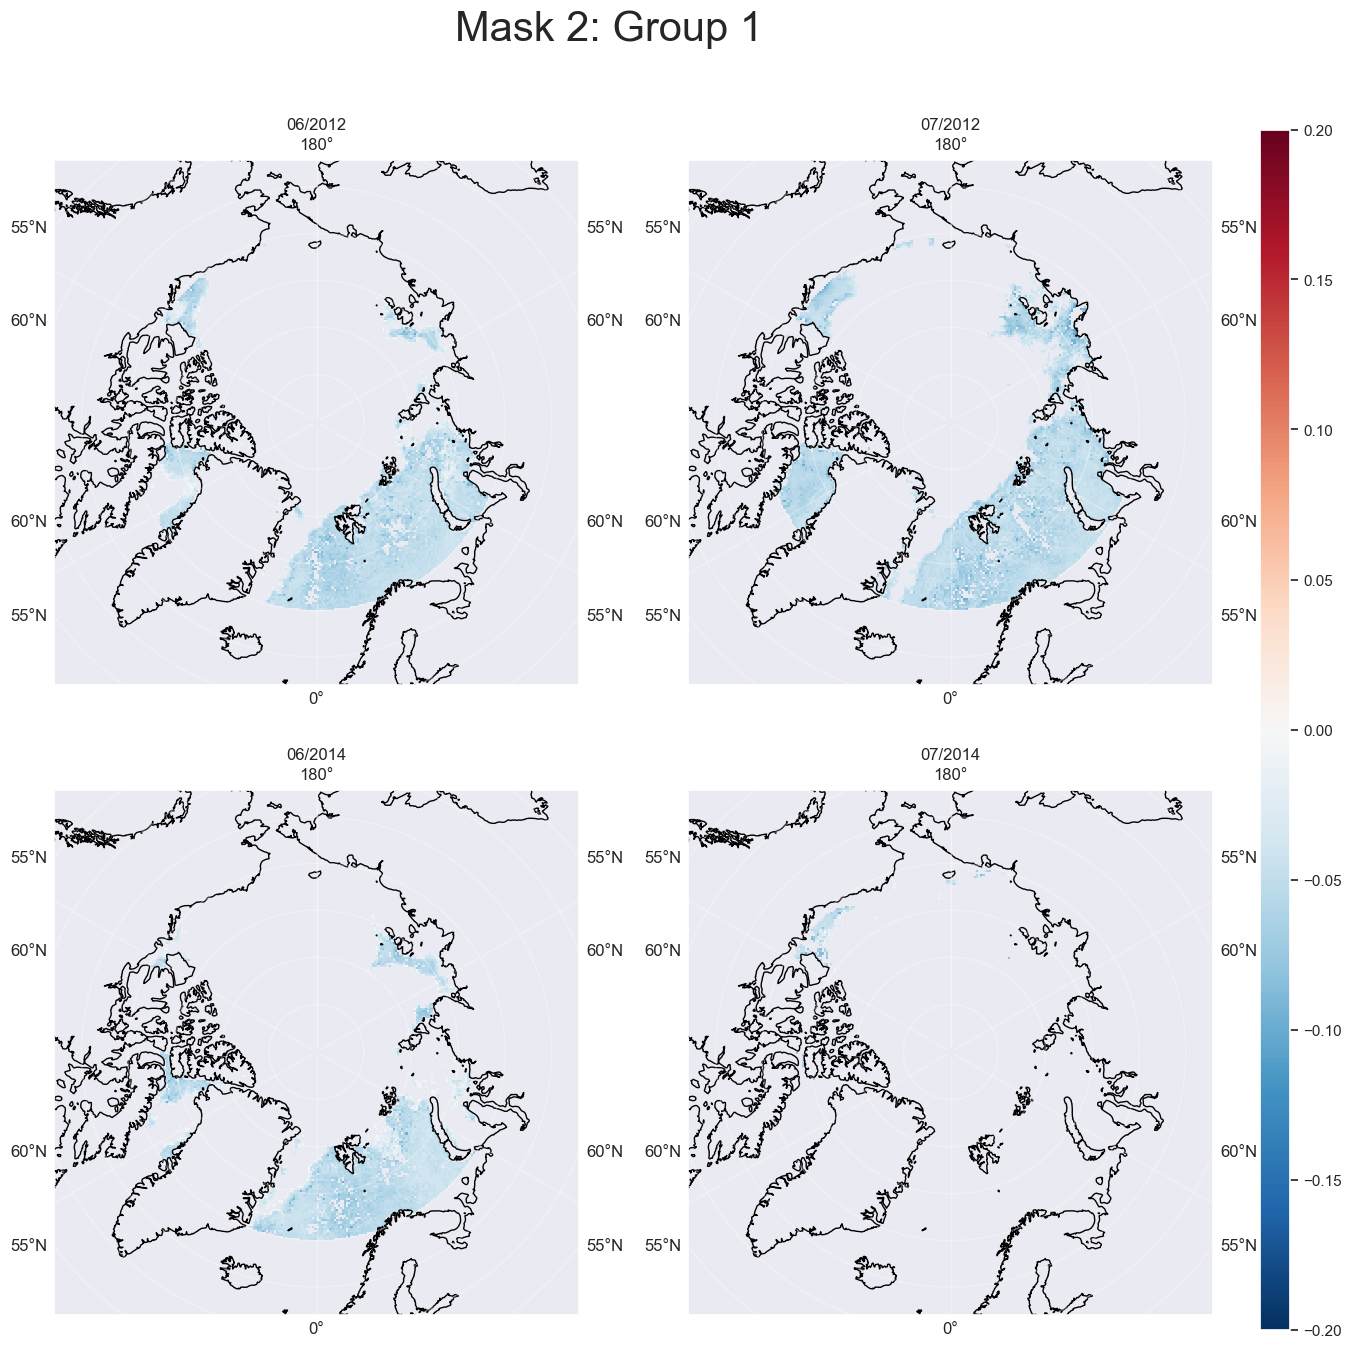

In [103]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=1)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062012_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=1)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072012_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=1)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062014_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=1)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072014_1, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 2: Group 1 ', fontsize=30)

cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group1.png')


Plot group 2

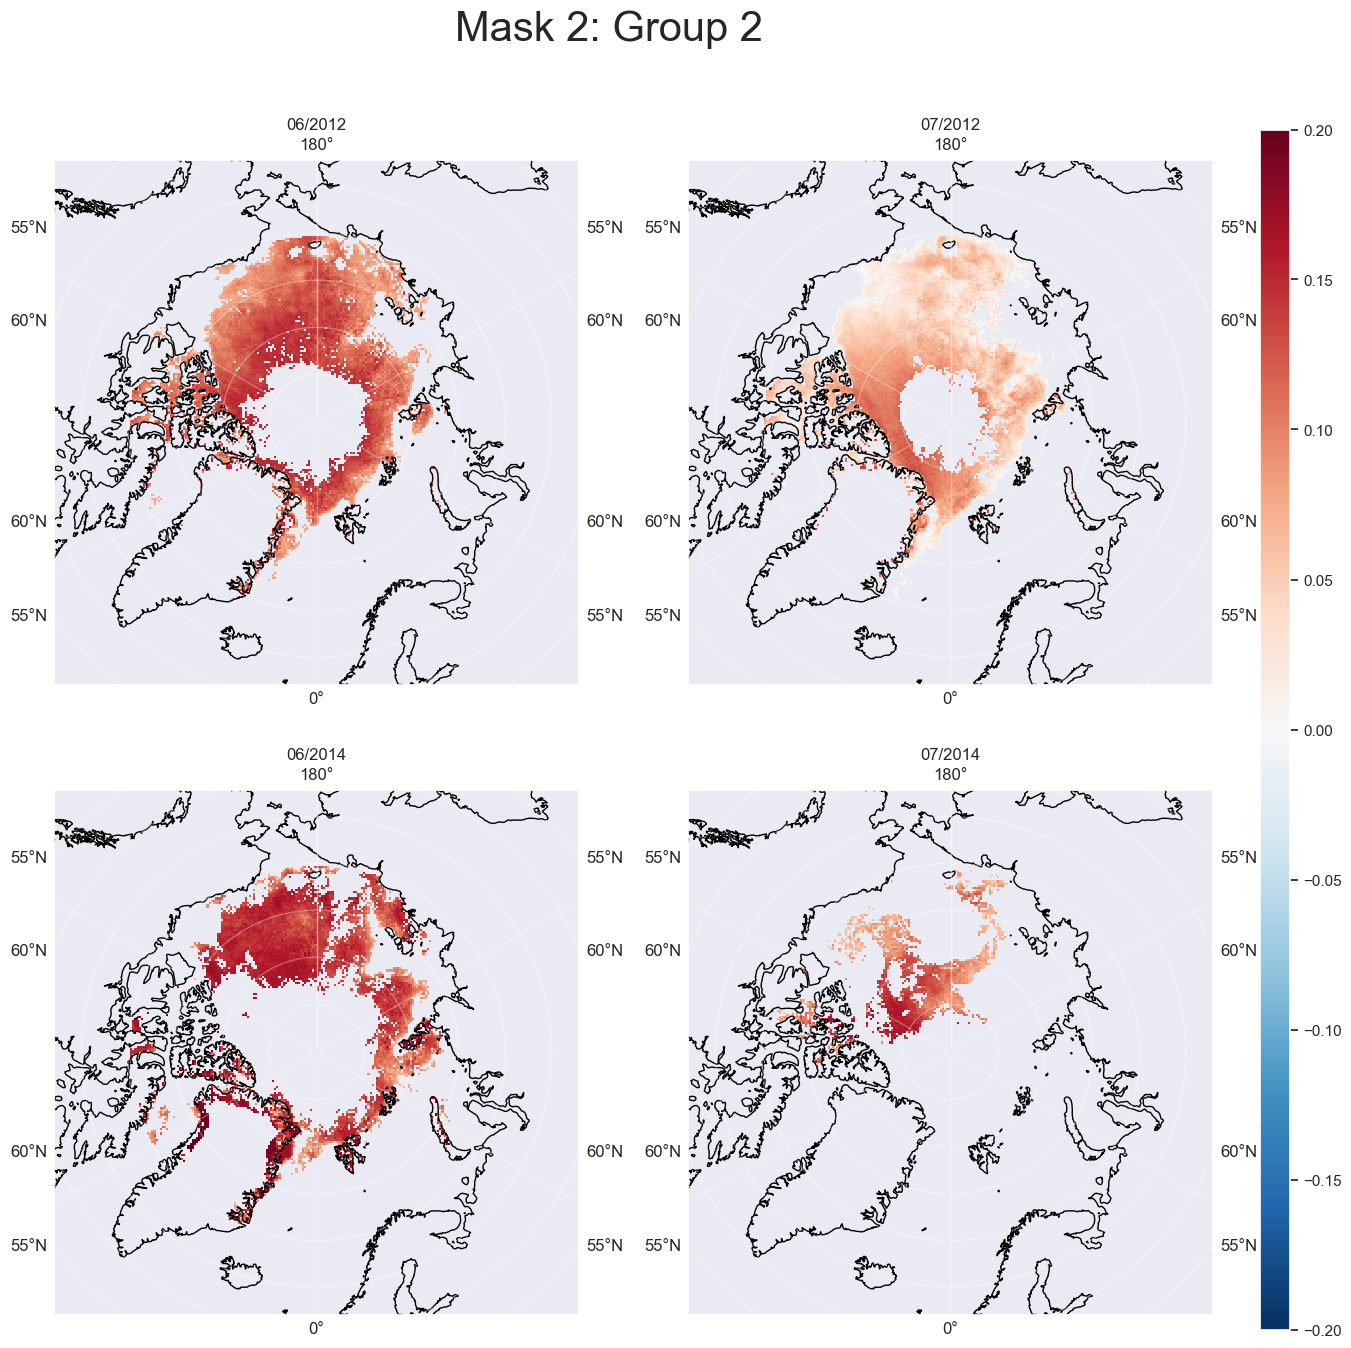

In [104]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=1)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062012_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=1)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072012_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=1)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062014_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=1)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072014_2, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 2: Group 2 ', fontsize=30)

cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group2.png')

Plot group 3

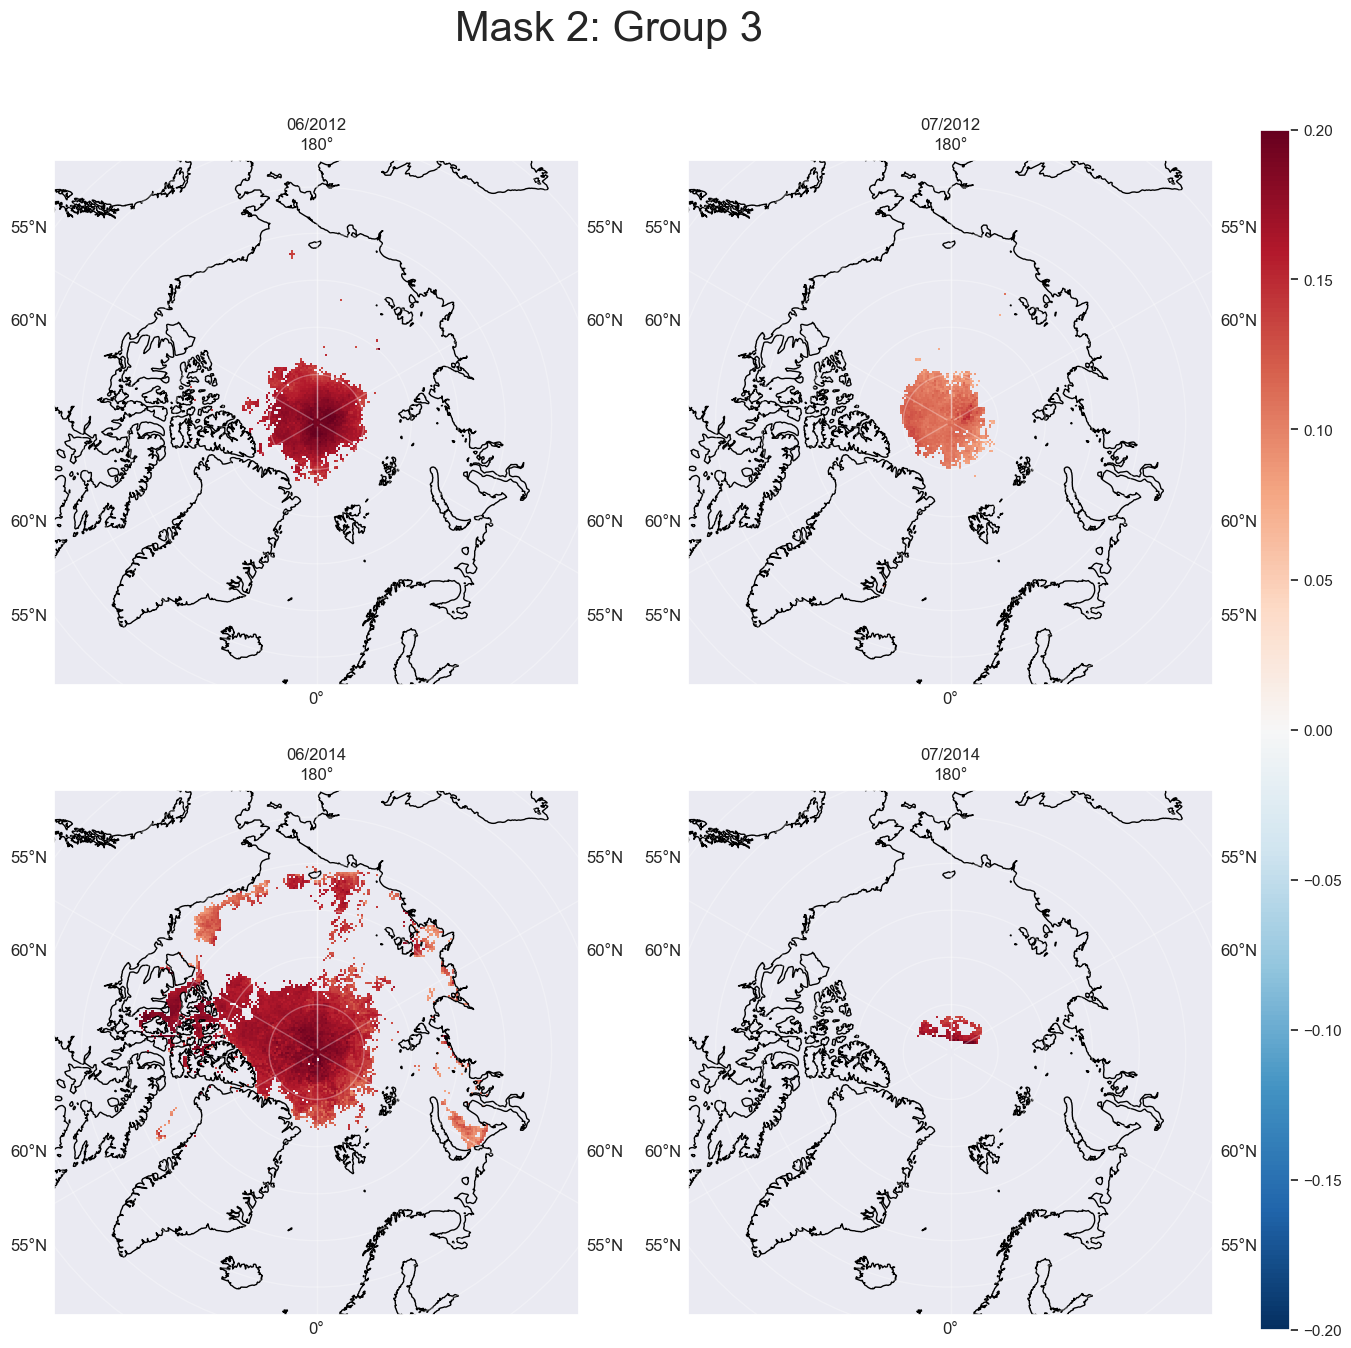

In [107]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=1)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062012_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=1)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072012_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=1)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062014_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=1)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072014_3, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 2: Group 3 ', fontsize=30)

cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group3.png')

Plot group 4

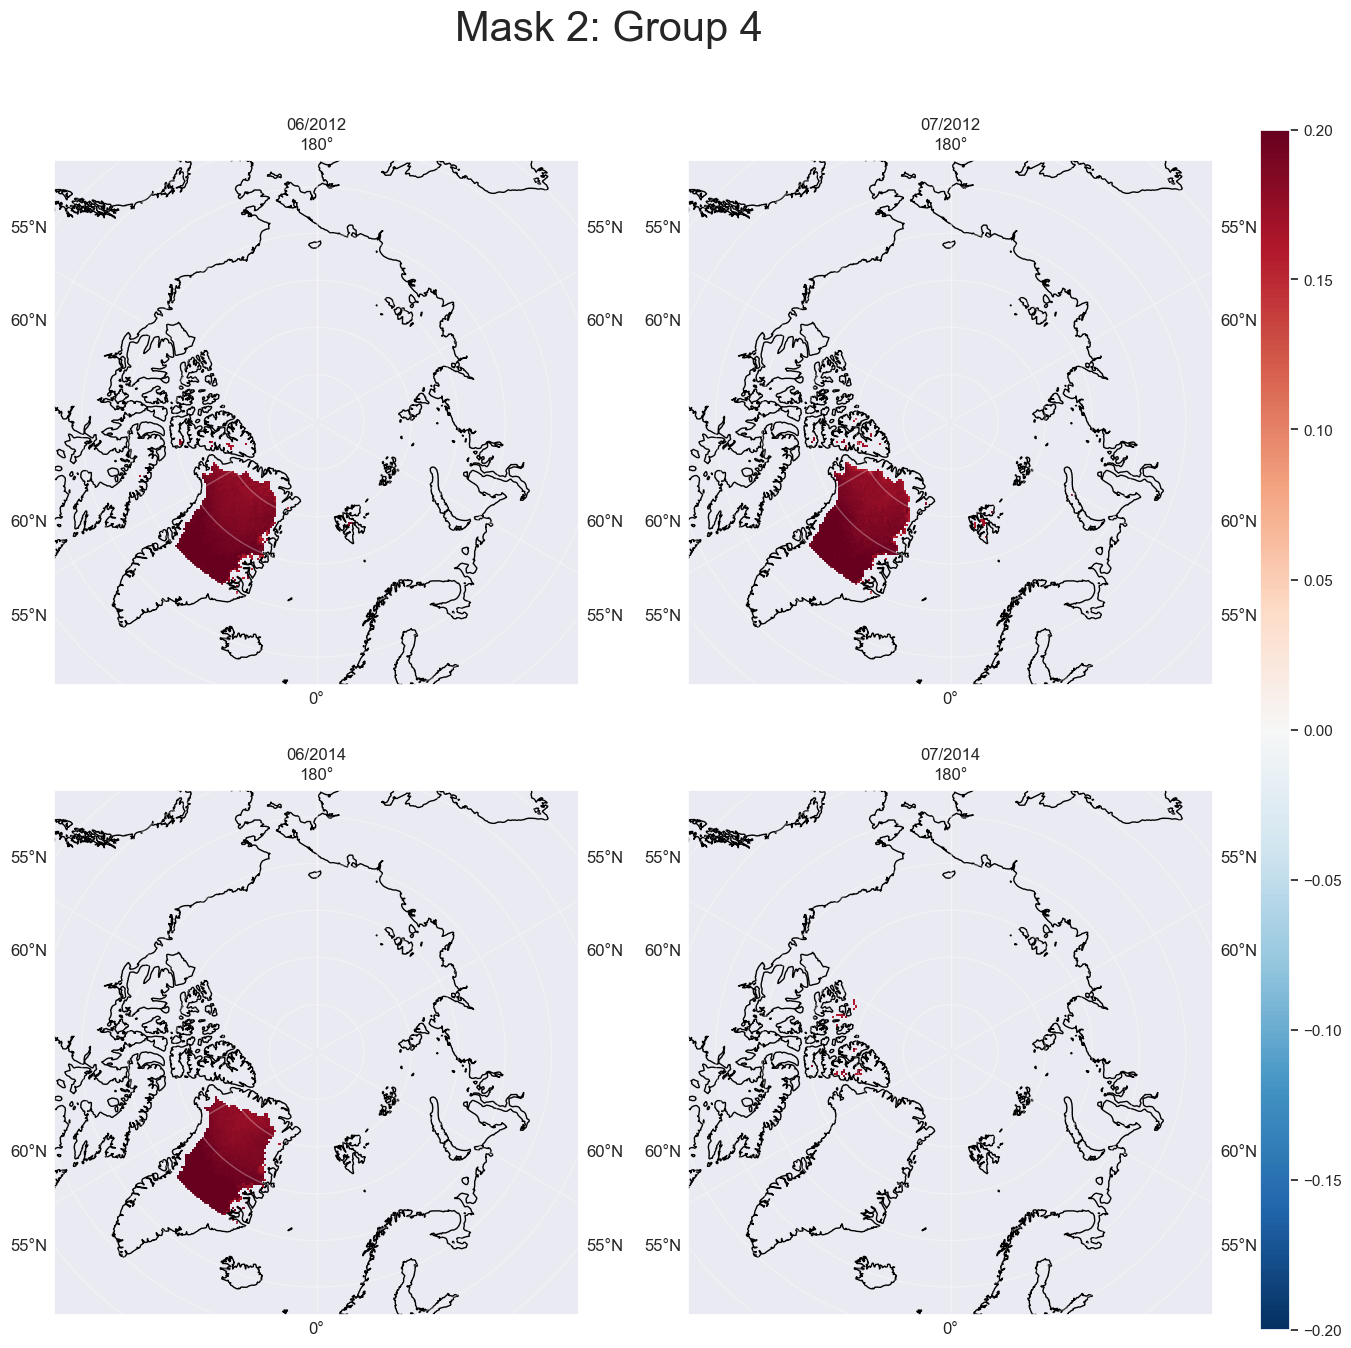

In [108]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=1)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062012_4, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=1)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072012_4, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=1)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_062014_4, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=1)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.pcolormesh(tgt_lon[1:, 1:].T, tgt_lat[1:, 1:].T, data_072014_4, transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='RdBu_r')
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 2: Group 4 ', fontsize=30)

cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group4.png')

Plot group 5

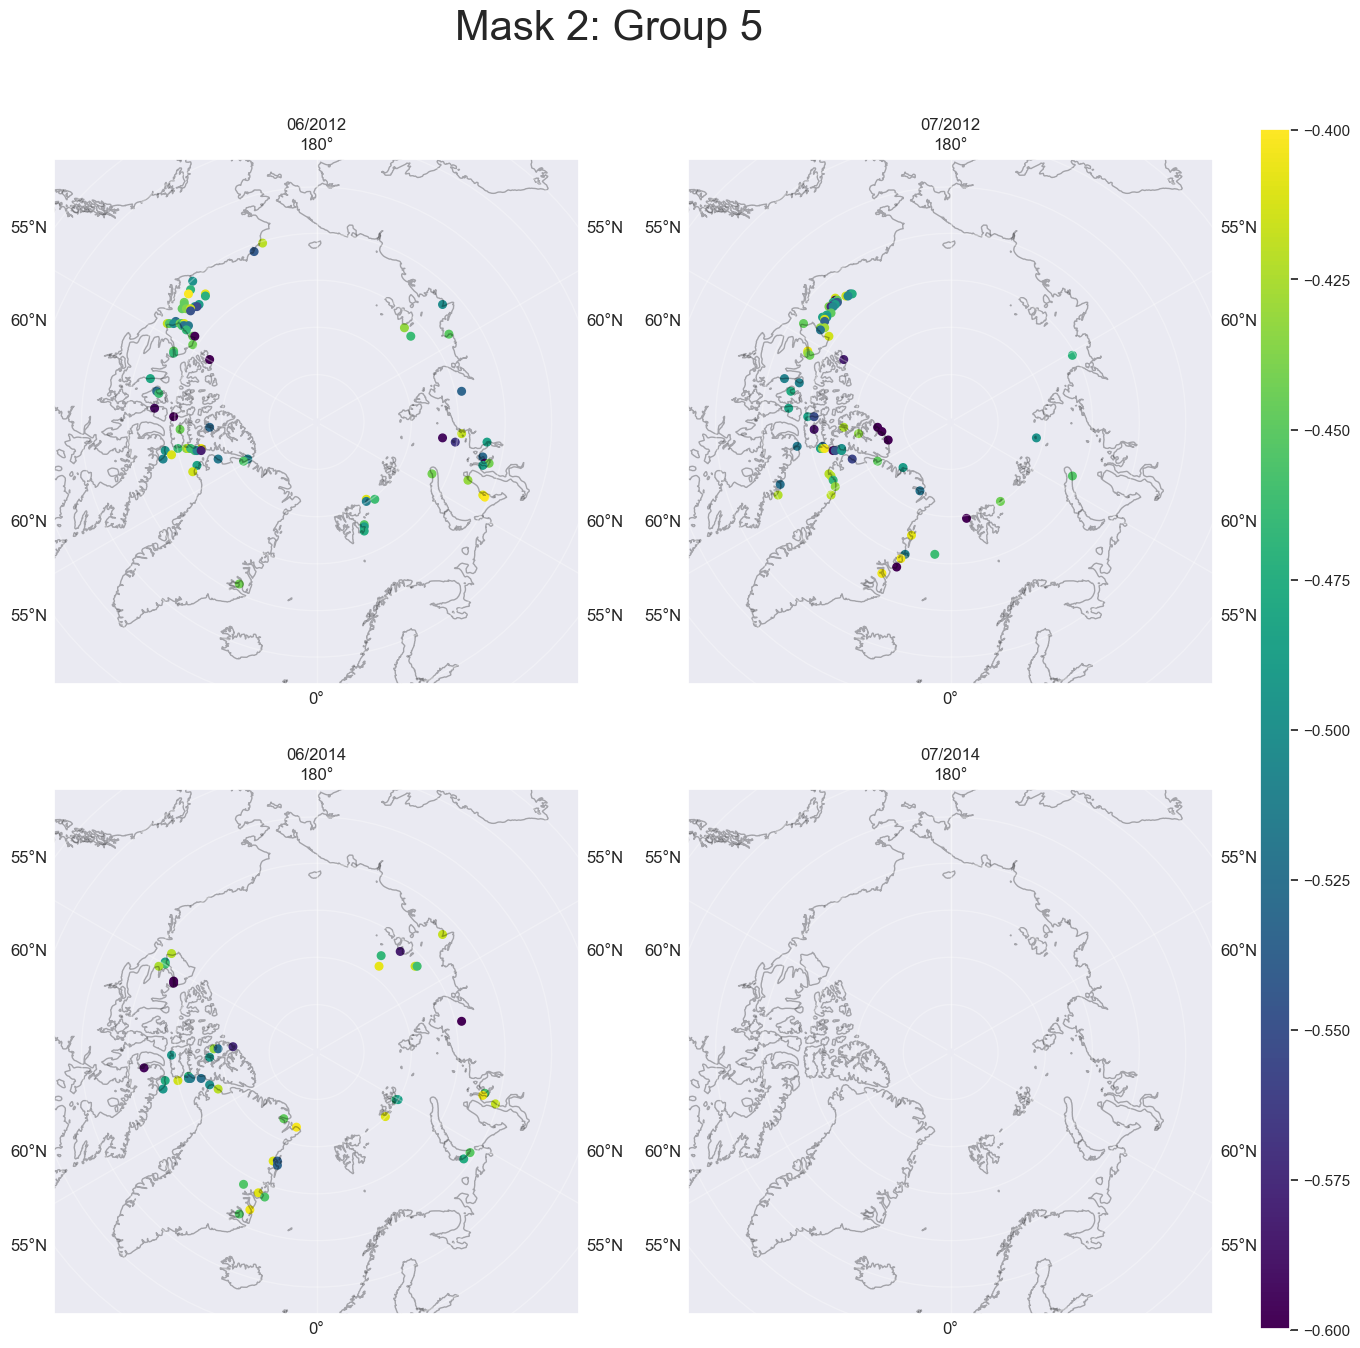

In [96]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,15), subplot_kw={'projection':ccrs.LambertAzimuthalEqualArea(central_latitude=90)})

ax0 = ax[0,0]
ax0.coastlines(alpha=0.3)
ax0.gridlines(draw_labels=True, alpha=0.3)
image0 = ax0.scatter(data_201206_5['lon'], data_201206_5['lat'], c=data_201206_5_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
ax0.set_extent([-45,135,50,70])
ax0.set_title('06/2012')


ax1 = ax[0,1]
ax1.coastlines(alpha=0.3)
ax1.gridlines(draw_labels=True, alpha=0.3)
image1 = ax1.scatter(data_201207_5['lon'], data_201207_5['lat'], c=data_201207_5_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
ax1.set_extent([-45,135,50,70])
ax1.set_title('07/2012')

ax2 = ax[1,0]
ax2.coastlines(alpha=0.3)
ax2.gridlines(draw_labels=True, alpha=0.3)
image2 = ax2.scatter(data_201406_5['lon'], data_201406_5['lat'], c=data_201406_5_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
ax2.set_extent([-45,135,50,70])
ax2.set_title('06/2014')

ax3 = ax[1,1]
ax3.coastlines(alpha=0.3)
ax3.gridlines(draw_labels=True, alpha=0.3)
image3 = ax3.scatter(data_201407_5['lon'], data_201407_5['lat'], c=data_201407_5_mean, s=30, transform=ccrs.PlateCarree(), vmin=-0.6, vmax=-0.4, cmap="viridis")
#plt.colorbar(image0)
ax3.set_extent([-45,135,50,70])
ax3.set_title('07/2014')

fig.suptitle('Mask 2: Group 5 ', fontsize=30)
cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(image0, cax=cb_ax)

plt.savefig(save_path + 'SAL_TOA_difference_map_mask2_Group5.png')